####   Locating Current working directory of our project on the pc

In [30]:
import os
os.getcwd()

'C:\\Windows\\system32\\1033\\MALARIA EDA'

In [2]:
#Getting interaction between the Operating System and pproject file directory on the pc to jupyter lab
os.chdir('C:\\Windows\\System32\\1033\\MALARIA EDA')

In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [4]:
# Returns a list of pathnames(Files) matching provided string 
import glob
glob.glob("C:\\Windows\\System32\\1033\\MALARIA EDA/Malaria data/*.csv")

['C:\\Windows\\System32\\1033\\MALARIA EDA/Malaria data\\Malaria data 2020.csv',
 'C:\\Windows\\System32\\1033\\MALARIA EDA/Malaria data\\Malaria data 2021.csv',
 'C:\\Windows\\System32\\1033\\MALARIA EDA/Malaria data\\Malaria data 2022.csv',
 'C:\\Windows\\System32\\1033\\MALARIA EDA/Malaria data\\Malaria data 2023.csv',
 'C:\\Windows\\System32\\1033\\MALARIA EDA/Malaria data\\Malaria data 2024.csv']

####   Merging All the Data Frames(Master_df) and Adding a 'Year' column

In [5]:
import glob
import pandas as pd
import os  #  os for the path functions

def clean_columns(df):
    df.columns = df.columns.str.strip()  # remove leading/trailing spaces
    df.columns = df.columns.str.replace(r"\s+", " ", regex=True)  # normalize multiple spaces to one
    return df

# Collect all CSVs
all_files = glob.glob("C:\\Windows\\System32\\1033\\MALARIA EDA/Malaria data/*.csv")

dfs = []
for file in all_files:
    df = pd.read_csv(file)
    df = clean_columns(df)
   #, encoding="cp1252" 
    # Extract year from file name (this needs to be inside the loop)
    year = os.path.splitext(os.path.basename(file))[0].split()[-1]
    df["Year"] = int(year)
    
    dfs.append(df)  # This also needs to be inside the loop

# Combine into one master DataFrame
master_df = pd.concat(dfs, ignore_index=True)

print(master_df[["Year"]].head(20))
print(master_df.columns.tolist())

    Year
0   2020
1   2020
2   2020
3   2020
4   2020
5   2020
6   2020
7   2020
8   2020
9   2020
10  2020
11  2020
12  2020
13  2020
14  2020
15  2020
16  2020
17  2020
18  2020
19  2020
['Region', 'District', '0-28 DAYS FEMALE', '0-28 DAYS MALE', '0-28 DAYS TOTAL', '10-19 YEARS FEMALE', '10-19 YEARS MALE', '10-19YRS TOTAL', '20+ YRS FEMALE', '20+ YRS MALE', '20+ YRS TOTAL', '5-9YRS FEMALE', '5-9YRS MALE', '5-9YRS TOTAL', '29 DAYS-4YRS FEMALE', '29DAYS - 4YRS MALE', '29 DAYS - 4YRS TOTAL', '0-28 DAYS (B/S & RDT) FEMALE', '0-28 DAYS (B/S & RDT) MALE', '0-28 DAYS (B/S & RDT) TOTAL', '10-19 YRS (B/S & RDT) FEMALE', '10-19 YRS (B/S & RDT) MALE', '10-19 YRS (B/S & RDT) TOTAL', '20+ (B/S &RDT) FEMALE', '20+ (B/S & RDT) MALE', '20 + (B/S & RDT) TOTAL', '29DAYS-4YRS (B/S & RDT) FEMALE', '29DAYS-4YRS (B/S & RDT) MALE', '29DAYS-4 YRS (B/S & RDT) TOTAL', '5-9YRS (B/S & RDT) FEMALE', '5-9YRS (B/S & RDT) MALE', '5-9YRS (B/S & RDT) TOTAL', 'TOTAL CASES CONFIRMED(B/S & RDT)', '0-28 DAYS FEMALE CT',

In [10]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 68 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Region                              805 non-null    object 
 1   District                            805 non-null    object 
 2   0-28 DAYS FEMALE                    805 non-null    int64  
 3   0-28 DAYS MALE                      805 non-null    int64  
 4   0-28 DAYS TOTAL                     805 non-null    int64  
 5   10-19 YEARS FEMALE                  805 non-null    int64  
 6   10-19 YEARS MALE                    805 non-null    int64  
 7   10-19YRS TOTAL                      644 non-null    float64
 8   20+ YRS FEMALE                      805 non-null    int64  
 9   20+ YRS MALE                        805 non-null    int64  
 10  20+ YRS TOTAL                       805 non-null    int64  
 11  5-9YRS FEMALE                       805 non-n

In [8]:
master_df.shape

(805, 73)

In [29]:
master_df.groupby("Year").size()

Year
2020    161
2021    161
2022    161
2023    161
2024    161
dtype: int64

### Removing Unwanted Columns

In [7]:

# Dropping some columns
#Dropping some Columns
df.drop(columns = ["POPULATION IN 2014", "POPULATION IN 2024"
                           ], inplace = True)

In [8]:
master_df.drop( columns = "ANNUAL GROWTH RATE[Pt?=P0?×(1+r)t]", inplace = True)

In [9]:
master_df.drop( columns = "ANNUAL GROWTH RATE[Pt​=P0​×(1+r)t]", inplace = True)

In [61]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 69 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Region                              805 non-null    object 
 1   District                            805 non-null    object 
 2   0-28 DAYS FEMALE                    805 non-null    int64  
 3   0-28 DAYS MALE                      805 non-null    int64  
 4   0-28 DAYS TOTAL                     805 non-null    int64  
 5   10-19 YEARS FEMALE                  805 non-null    int64  
 6   10-19 YEARS MALE                    805 non-null    int64  
 7   10-19YRS TOTAL                      644 non-null    float64
 8   20+ YRS FEMALE                      805 non-null    int64  
 9   20+ YRS MALE                        805 non-null    int64  
 10  20+ YRS TOTAL                       805 non-null    int64  
 11  5-9YRS FEMALE                       805 non-n

#### Merging misfit columns (columns that failed to merge due to spacing)

In [11]:
# Dictionary of columns that should be merged
merge_map = {
    "20+ (B/S &RDT) MALE": "20+ (B/S & RDT) MALE",
    "29DAYS-4YRS MALE": "29DAYS - 4YRS MALE",
    "10-19 YRS TOTAL": "10-19YRS TOTAL",
} 

for bad_col, good_col in merge_map.items():
    if bad_col in master_df.columns and good_col in master_df.columns:
        # Merge values where good_col is missing
        master_df[good_col] = master_df[good_col].fillna(master_df[bad_col])
        # Drop the redundant col
        master_df = master_df.drop(columns=[bad_col])

###  Checking Data types

In [14]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 65 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Region                              805 non-null    object 
 1   District                            805 non-null    object 
 2   0-28 DAYS FEMALE                    805 non-null    int64  
 3   0-28 DAYS MALE                      805 non-null    int64  
 4   0-28 DAYS TOTAL                     805 non-null    int64  
 5   10-19 YEARS FEMALE                  805 non-null    int64  
 6   10-19 YEARS MALE                    805 non-null    int64  
 7   10-19YRS TOTAL                      805 non-null    float64
 8   20+ YRS FEMALE                      805 non-null    int64  
 9   20+ YRS MALE                        805 non-null    int64  
 10  20+ YRS TOTAL                       805 non-null    int64  
 11  5-9YRS FEMALE                       805 non-n

### Inspection of Our data

In [12]:
male_2022 = master_df.loc[master_df["Year"] == 2022, "<5YRS MALE TOTAL"]
print(male_2022.head(10))

324     10358.0
325    174691.0
326     42372.0
327     25072.0
328     19386.0
329     11481.0
330      3809.0
331     10834.0
332     19838.0
333     50502.0
Name: <5YRS MALE TOTAL, dtype: float64


In [13]:
pivoted = master_df.pivot_table(
    index=["Region", "District"],  # or whatever index makes sense
    columns="Year",
    values="<5YRS MALE TOTAL",
    aggfunc="sum"
)

print(pivoted.head())


Year                       2020      2021      2022      2023      2024
Region District                                                        
Acholi Acholi          185689.0  125118.0  174691.0  151443.0  126811.0
       Agago District   32950.0   17612.0   25072.0   26100.0   22495.0
       Amuru District   20467.0   13938.0   19838.0   14084.0   10541.0
       Gulu City        12037.0    8335.0   12274.0    9442.0    7956.0
       Gulu District    13542.0   10120.0   12658.0   10049.0    8875.0


In [88]:
pivoted.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 161 entries, ('Acholi', 'Acholi') to ('West Nile', 'Zombo District')
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2020    161 non-null    float64
 1   2021    161 non-null    float64
 2   2022    161 non-null    float64
 3   2023    161 non-null    float64
 4   2024    161 non-null    float64
dtypes: float64(5)
memory usage: 8.2+ KB


###  Handling Missing Values  and Lat-Lot Columns

In [15]:
# Convert to numeric safely
master_df['CORDINATES (LATITUDE ° N)'] = pd.to_numeric(master_df['CORDINATES (LATITUDE ° N)'], errors='coerce')
master_df['CORDINATES (LONGITUDE ° E)'] = pd.to_numeric(master_df['CORDINATES (LONGITUDE ° E)'], errors='coerce')

# Fill missing coords within same District (if available)
master_df['CORDINATES (LATITUDE ° N)'] = (
    master_df.groupby('District')['CORDINATES (LATITUDE ° N)']
    .transform(lambda x: x.fillna(x.median()))
)
master_df['CORDINATES (LONGITUDE ° E)'] = (
    master_df.groupby('District')['CORDINATES (LONGITUDE ° E)']
    .transform(lambda x: x.fillna(x.median()))
)

# If still missing (district has no coords at all) → leave NaN


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keep

In [16]:
# Count missing values per column
missing_report = master_df.isna().sum()

# Show only columns with missing data
missing_report = missing_report[missing_report > 0].sort_values(ascending=False)

print(missing_report)


CORDINATES (LONGITUDE ° E)    135
CORDINATES (LATITUDE ° N)      70
POPULATION IN 2014             10
AREA(Km2)                      10
POPULATION IN 2024             10
dtype: int64


In [25]:
# Filling Missing Values in the dataset
master_df = master_df.fillna(0)

In [24]:
# Count missing values per column
missing_report = master_df.isna().sum()

# Show only columns with missing data
missing_report = missing_report[missing_report > 0].sort_values(ascending=False)

print(missing_report)


CORDINATES (LONGITUDE ° E)            135
CORDINATES (LATITUDE ° N)              70
POPULATION IN 2014                     10
POPULATION IN 2024                     10
AREA(Km2)                              10
POPULATION DENSITY(People per km2)     10
TOTAL POPULATION                       10
Incidence_Rate                         10
POPULATION DENSITY                     10
dtype: int64


In [99]:
master_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 65 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Region                              807 non-null    object 
 1   District                            807 non-null    object 
 2   0-28 DAYS FEMALE                    807 non-null    float64
 3   0-28 DAYS MALE                      807 non-null    float64
 4   0-28 DAYS TOTAL                     807 non-null    float64
 5   10-19 YEARS FEMALE                  807 non-null    float64
 6   10-19 YEARS MALE                    807 non-null    float64
 7   10-19YRS TOTAL                      807 non-null    float64
 8   20+ YRS FEMALE                      807 non-null    float64
 9   20+ YRS MALE                        807 non-null    float64
 10  20+ YRS TOTAL                       807 non-null    float64
 11  5-9YRS FEMALE                       807 non-n

## Calculation of Key Metrics

In [19]:
master_df['Incidence_Rate'] = (
    master_df['TOTAL CASES CONFIRMED(B/S & RDT)'] / master_df['TOTAL POPULATION']
) * 1000

In [18]:
master_df['TOTAL POPULATION'] = pd.to_numeric(master_df['TOTAL POPULATION'], errors='coerce')


In [26]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 67 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Region                              805 non-null    object 
 1   District                            805 non-null    object 
 2   0-28 DAYS FEMALE                    805 non-null    int64  
 3   0-28 DAYS MALE                      805 non-null    int64  
 4   0-28 DAYS TOTAL                     805 non-null    int64  
 5   10-19 YEARS FEMALE                  805 non-null    int64  
 6   10-19 YEARS MALE                    805 non-null    int64  
 7   10-19YRS TOTAL                      805 non-null    float64
 8   20+ YRS FEMALE                      805 non-null    int64  
 9   20+ YRS MALE                        805 non-null    int64  
 10  20+ YRS TOTAL                       805 non-null    int64  
 11  5-9YRS FEMALE                       805 non-n

In [21]:
master_df['POPULATION DENSITY(People per km2)'] = pd.to_numeric(master_df['POPULATION DENSITY(People per km2)'], errors='coerce')

In [22]:
master_df['POPULATION DENSITY'] = master_df['TOTAL POPULATION'] / master_df['AREA(Km2)']

In [27]:
master_df.to_csv("master_malaria_cleaned1.csv", index=False)

In [28]:
import os
print(os.getcwd())

C:\Windows\system32\1033\MALARIA EDA


## Advanced Analysis (TIME SERIES ANALYSIS)

## Total Malaria Cases Confirmed by District

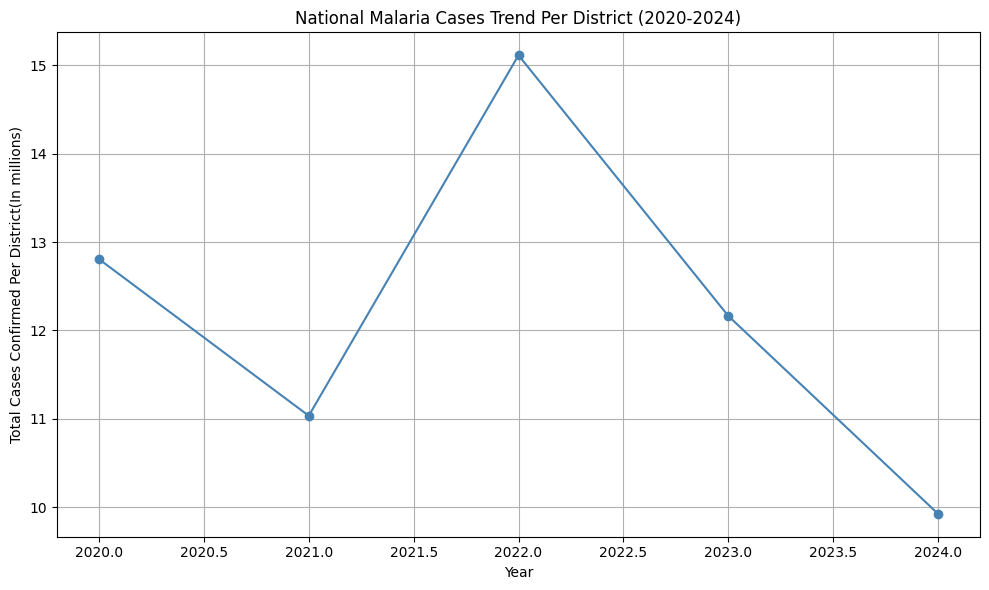

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# column names
district_col = 'District'
cases_col = 'TOTAL CASES CONFIRMED(B/S & RDT)'
year_col = 'Year'

# 1. Keep only rows where District ends with "District" (case-insensitive)
district_only = master_df[
    master_df[district_col].str.contains(r'\bDistrict$', case=False, na=False)
].copy()

# 2. Ensure the cases column is numeric and handle missing/invalid values
district_only[cases_col] = pd.to_numeric(district_only[cases_col], errors='coerce').fillna(0)

# 3. Group by Year and sum cases for district-only rows
yearly_trend_districts = (
    district_only.groupby(year_col)[cases_col]
    .sum()
    .sort_index()   # ensures years are in ascending order
)

# 4. Plot
plt.figure(figsize=(10, 6))
plt.plot(
    yearly_trend_districts.index,
    yearly_trend_districts.values / 1e6,  # divide by 1,000,000 to show millions
    marker='o',
    color='steelblue'
)
plt.title('National Malaria Cases Trend Per District (2020-2024)')
plt.xlabel('Year')
plt.ylabel('Total Cases Confirmed Per District(In millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Total Malaria Cases Confirmed by Region(2020-2024)

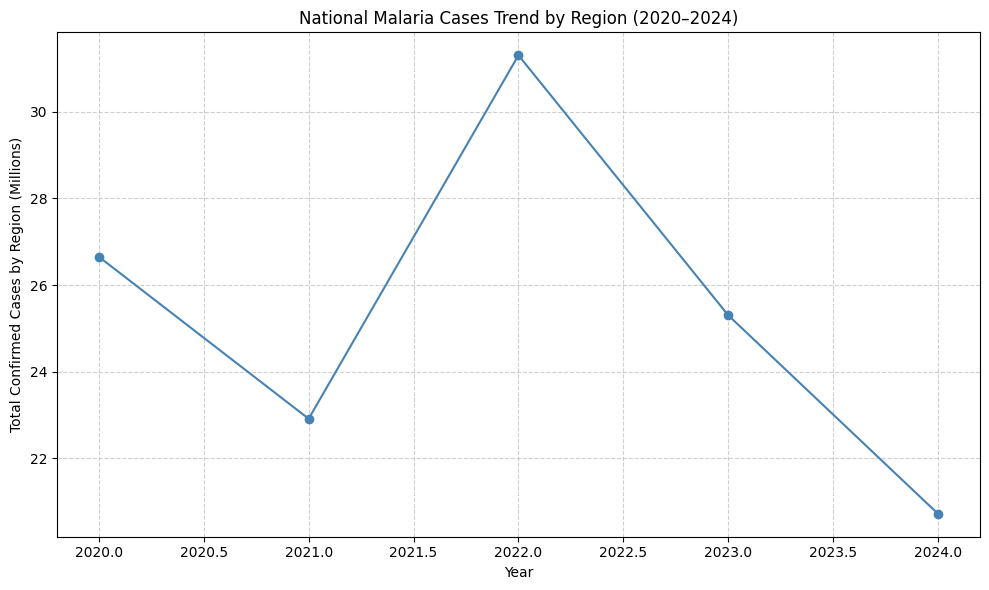

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Column names
region_col = 'Region'   # <-- Now using REGION correctly
cases_col = 'TOTAL CASES CONFIRMED(B/S & RDT)'
year_col = 'Year'

# 1️⃣ Select only REGION rows
#    A region row is one where Region column is NOT empty
region_only = master_df[master_df[region_col].notna()].copy()

# 2️⃣ Convert malaria cases to numeric
region_only[cases_col] = pd.to_numeric(region_only[cases_col], errors='coerce').fillna(0)

# 3️⃣ Group by Year and sum malaria cases for REGIONS ONLY
yearly_trend_regions = (
    region_only.groupby(year_col)[cases_col]
    .sum()
    .sort_index()
)

# 4️⃣ Plot the Trend (values shown in millions)
plt.figure(figsize=(10, 6))
plt.plot(
    yearly_trend_regions.index,
    yearly_trend_regions.values / 1e6,   # Display in millions
    marker='o',
    color='steelblue'
)

plt.title('National Malaria Cases Trend by Region (2020–2024)')
plt.xlabel('Year')
plt.ylabel('Total Confirmed Cases by Region (Millions)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Comment on Malaria Trends Between 2020 and 2024

- The  plot shows a clear downward trend in malaria cases from 2020 to 2024, which is very promising! This suggests that malaria control interventions in Uganda have been effective during this period. The trend appears relatively consistent without major fluctuations, indicating sustained progress rather than temporary improvements.

# Perfoming Mild Data Inspections

In [105]:
male_2022 = master_df.loc[master_df["Year"] == 2022, "GRAND TOTAL CASES"]
print(male_2022.head(10))

324      81531.0
325    1619797.0
326     382425.0
327     287254.0
328     143537.0
329     120834.0
330      27859.0
331     122501.0
332     173172.0
333     739320.0
Name: GRAND TOTAL CASES, dtype: float64


In [106]:
# totals and percent change
yearly = master_df.groupby('Year')['GRAND TOTAL CASES'].sum().reset_index()
yearly['pct_change'] = yearly['GRAND TOTAL CASES'].pct_change() * 100
print(yearly)


   Year  GRAND TOTAL CASES  pct_change
0  2020         25562132.0         NaN
1  2021         24494524.0   -4.176522
2  2022         33137156.0   35.283935
3  2023         26640258.0  -19.606082
4  2024         25562132.0   -4.046980


In [108]:
districts_by_year = master_df.groupby('Year')['District'].nunique().reset_index(name='n_districts')
print(districts_by_year)


   Year  n_districts
0  2020          161
1  2021          162
2  2022          161
3  2023          161
4  2024          161


In [39]:
dups = master_df.duplicated(subset=['Year','District'], keep=False).sum()
print("Duplicate rows (district-year):", dups)


Duplicate rows (district-year): 0


In [40]:
yearly = master_df.groupby('Year')['GRAND TOTAL CASES'].sum().reset_index(name='total_cases')
yearly['pct_change'] = yearly['total_cases'].pct_change() * 100
print(yearly)

   Year  total_cases  pct_change
0  2020   12257236.0         NaN
1  2021   11756519.0   -4.085073
2  2022   15961208.0   35.764745
3  2023   12770865.0  -19.988105
4  2024   12257236.0   -4.021881


In [107]:
# 1) Yearly totals & percent changes
yearly = master_df.groupby('Year')['GRAND TOTAL CASES'].sum().reset_index(name='total_cases')
yearly['pct_change'] = yearly['total_cases'].pct_change() * 100
print(yearly)

# 2) Number of unique districts reported per year (coverage check)
districts_by_year = master_df.groupby('Year')['District'].nunique().reset_index(name='n_districts')
print(districts_by_year)

# 3) Duplicate check (should be one row per district-year after aggregation)
dups = master_df.duplicated(subset=['Year','District'], keep=False).sum()
print("Duplicate district-year rows:", dups)

# 4) Show rows (district-years) that have GRAND TOTAL CASES == 0 or NaN
print(master_df[master_df['GRAND TOTAL CASES'].isna()].shape)
print(master_df[master_df['GRAND TOTAL CASES']==0].shape)

# 5) Monthly seasonality check (if you have month column)
if 'Month' in master_df.columns:
    monthly = master_df.groupby(['Year','Month'])['GRAND TOTAL CASES'].sum().unstack(0)
    print(monthly)

# 6) Convert to rates per 1000 (recommended)
master_df['TOTAL POPULATION'] = pd.to_numeric(master_df['TOTAL POPULATION'], errors='coerce')
agg = master_df.groupby(['Year','District'], as_index=False).agg({
    'GRAND TOTAL CASES':'sum',
    'TOTAL POPULATION':'first'
})
agg['cases_per_1000'] = agg['GRAND TOTAL CASES'] / agg['TOTAL POPULATION'] * 1000
print(agg.head())


   Year  total_cases  pct_change
0  2020   25562132.0         NaN
1  2021   24494524.0   -4.176522
2  2022   33137156.0   35.283935
3  2023   26640258.0  -19.606082
4  2024   25562132.0   -4.046980
   Year  n_districts
0  2020          161
1  2021          162
2  2022          161
3  2023          161
4  2024          161
Duplicate district-year rows: 2
(0, 65)
(2, 65)
   Year           District  GRAND TOTAL CASES  TOTAL POPULATION  \
0  2020      Abim District            81614.0      1.283761e+05   
1  2020             Acholi          1659514.0      1.806585e+06   
2  2020  Adjumani District           326452.0      1.283761e+05   
3  2020     Agago District           272657.0      2.725824e+05   
4  2020  Alebtong District            35880.0      2.596354e+05   

   cases_per_1000  
0      635.741270  
1      918.591459  
2     2542.933920  
3     1000.273703  
4      138.193768  


## CALCULATION OF GLOBAL MORAN INDEX 

 -   Implementing  spatial autocorrelation analysis to determine if malaria distribution is clustered, random, or dispersed.

In [ ]:
pip install libpysal esda geopandas


- 𝐆𝐞𝐨𝐩𝐚𝐧𝐝𝐚𝐬: load, clean, and manipulate district shapefiles; join case/population tables to geometries; prepare map-ready GeoDataFrames for choropleths and spatial joins.
- 𝐋𝐢𝐛𝐲𝐬𝐚𝐥: build spatial weights (queen/rook contiguity, k-nearest neighbors, hybrid weights), compute connectivity diagnostics, and supply core utilities used by higher-level spatial tests.
- 𝐞𝐬𝐝𝐚: -  perform spatial autocorrelation and cluster detection (Global Moran’s I, Local Moran’s I, Getis-Ord Gi*) to identify statistically significant hotspots, coldspots, and spatial outliers for targeted DDA interventions.
- 𝐍𝐨𝐭𝐞: Together they enable us to define appropriate neighborhood structures, run robust spatial statistics, and produce actionable maps and ranked lists for intervention planning.
  


## PREPARING SPATIAL DATA 

In [109]:
import pandas as pd
import numpy as np
import libpysal as lps
from esda.moran import Moran

# Column names
district_col = 'District'
cases_col = 'TOTAL CASES CONFIRMED(B/S & RDT)'
lat_col = 'CORDINATES (LATITUDE ° N)'
lon_col = 'CORDINATES (LONGITUDE ° E)'
pop_col = 'TOTAL POPULATION'

# 1️⃣ Filter only rows that represent districts (exclude regions)
district_only = master_df[
    master_df[district_col].str.contains(r'\bDistrict$', case=False, na=False)
].copy()

# 2️⃣ Aggregate to ensure one row per district
district_data = district_only.groupby(district_col).agg({
    cases_col: 'sum',           # total confirmed cases per district
    lat_col: 'first',           # first valid latitude
    lon_col: 'first',           # first valid longitude
    pop_col: 'first'            # total population (or mean if varying by year)
}).reset_index()

# 3️⃣ Clean coordinate columns and population values
district_data['Latitude'] = pd.to_numeric(district_data[lat_col], errors='coerce')
district_data['Longitude'] = pd.to_numeric(district_data[lon_col], errors='coerce')
district_data['TOTAL POPULATION'] = pd.to_numeric(district_data[pop_col], errors='coerce')

# 4️⃣ Drop missing coordinate or population values
district_data = district_data.dropna(subset=['Latitude', 'Longitude', 'TOTAL POPULATION'])

# 5️⃣ Compute incidence rate (cases per 1,000 people)
district_data['Incidence_Rate'] = (district_data[cases_col] / district_data['TOTAL POPULATION']) * 1000

# 6️⃣ Verify structure
print("✅ Cleaned spatial dataset (district-level):")
print(district_data.head())
print(f"\nTotal districts included: {len(district_data)}")



✅ Cleaned spatial dataset (district-level):
            District  TOTAL CASES CONFIRMED(B/S & RDT)  \
0      Abim District                          401802.0   
1  Adjumani District                         1451151.0   
2     Agago District                         1231996.0   
3  Alebtong District                          492752.0   
4  Amolatar District                          375806.0   

   CORDINATES (LATITUDE ° N)  CORDINATES (LONGITUDE ° E)  TOTAL POPULATION  \
0                     2.7067                     33.6595       128376.1239   
1                     3.2549                     31.7195       128376.1239   
2                     2.9251                      0.0000       272582.3933   
3                     2.2914                     33.2139       259635.4412   
4                     1.6054                     32.8084       170846.7994   

   Latitude  Longitude  Incidence_Rate  
0    2.7067    33.6595     3129.881070  
1    3.2549    31.7195    11303.901036  
2    2.9251    

## Creating Spatial Weights Matrix

In [110]:
from libpysal.weights import DistanceBand

# Create coordinates array
coords = list(zip(district_data['Longitude'], district_data['Latitude']))

# Create distance-based weights (districts within 200km are neighbors)
w = DistanceBand(coords, threshold=200, binary=True)
w.transform = 'r'  # Row-standardize the weights

##  Calculating of Global  Moran Index 


In [111]:
# First, check for and handle missing values
print("Missing values in key columns:")
print(f"Incidence_Rate: {district_data['Incidence_Rate'].isnull().sum()}")
print(f"Latitude: {district_data['Latitude'].isnull().sum()}")
print(f"Longitude: {district_data['Longitude'].isnull().sum()}")

# Remove rows with missing coordinates or incidence rates
district_data_clean = district_data.dropna(subset=['Incidence_Rate', 'Latitude', 'Longitude']).copy()

# Check for infinite values and replace them
district_data_clean['Incidence_Rate'] = district_data_clean['Incidence_Rate'].replace([np.inf, -np.inf], np.nan)
district_data_clean = district_data_clean.dropna(subset=['Incidence_Rate'])

# Verify you have enough data points
print(f"Remaining districts after cleaning: {len(district_data_clean)}")

# Recreate coordinates and weights matrix with clean data
coords_clean = list(zip(district_data_clean['Longitude'], district_data_clean['Latitude']))
w_clean = DistanceBand(coords_clean, threshold=200, binary=True)
w_clean.transform = 'r'

# Now recalculate Moran's I
moran = Moran(district_data_clean['Incidence_Rate'], w_clean)

print(f"Moran's I Coefficient: {moran.I:.4f}")
print(f"P-value: {moran.p_sim:.6f}")
print(f"Z-score: {moran.z_sim:.4f}")

Missing values in key columns:
Incidence_Rate: 0
Latitude: 0
Longitude: 0
Remaining districts after cleaning: 136
Moran's I Coefficient: -0.0074
P-value: 0.445000
Z-score: 0.0135


In [112]:
# w_clean.cardinalities is a dict: {obs_id: neighbor_count}
no_neighbors = [k for k, v in w_clean.cardinalities.items() if v == 0]

if len(no_neighbors) > 0:
    print(f"{len(no_neighbors)} districts have no neighbors: {no_neighbors}")
else:
    print("All districts have at least one neighbor.")


All districts have at least one neighbor.


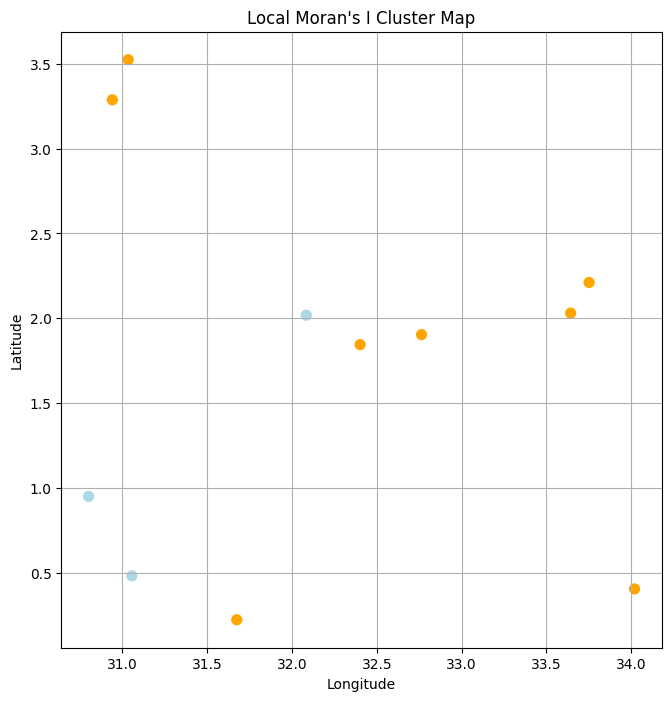

In [113]:
from esda.moran import Moran_Local
import matplotlib.pyplot as plt
import geopandas as gpd

# Calculate Local Moran's I
local_moran = Moran_Local(district_data_clean['Incidence_Rate'], w_clean)

# Add results to your dataframe
district_data_clean['Local_I'] = local_moran.Is
district_data_clean['p_sim'] = local_moran.p_sim
district_data_clean['Significant'] = local_moran.p_sim < 0.05
district_data_clean['Cluster_Type'] = local_moran.q

# Cluster types:
# 1 = High-High (hotspot)
# 2 = Low-High (outlier)
# 3 = Low-Low (coldspot)
# 4 = High-Low (outlier)

# Optional: convert to GeoDataFrame for mapping
gdf = gpd.GeoDataFrame(
    district_data_clean,
    geometry=gpd.points_from_xy(district_data_clean['Longitude'], district_data_clean['Latitude']),
    crs="EPSG:4326"
)

# Plot clusters
fig, ax = plt.subplots(figsize=(10, 8))
colors = {
    1: 'red',     # High-High
    2: 'lightblue', # Low-High
    3: 'blue',    # Low-Low
    4: 'orange'   # High-Low
}
gdf[gdf['Significant']].plot(
    ax=ax,
    color=gdf[gdf['Significant']]['Cluster_Type'].map(colors),
    markersize=50,
    legend=True
)
plt.title("Local Moran's I Cluster Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


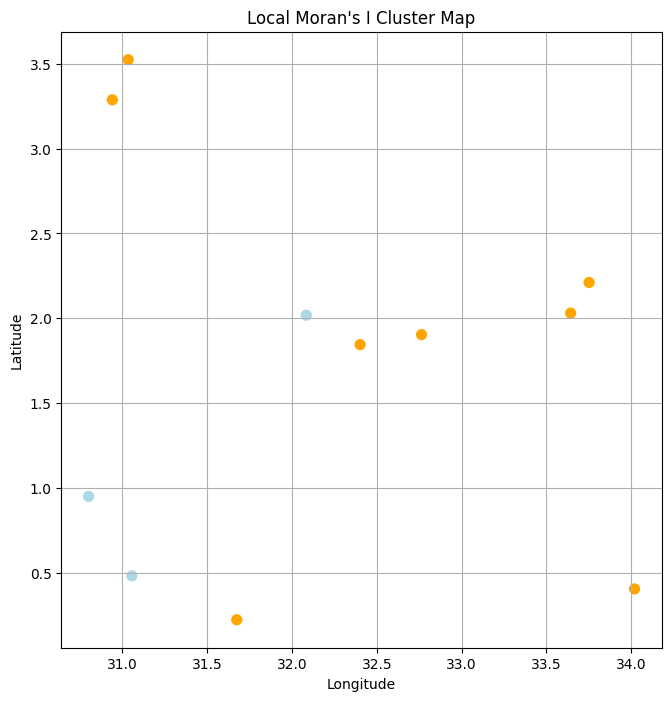

In [113]:
from esda.moran import Moran_Local
import matplotlib.pyplot as plt
import geopandas as gpd

# Calculate Local Moran's I
local_moran = Moran_Local(district_data_clean['Incidence_Rate'], w_clean)

# Add results to your dataframe
district_data_clean['Local_I'] = local_moran.Is
district_data_clean['p_sim'] = local_moran.p_sim
district_data_clean['Significant'] = local_moran.p_sim < 0.05
district_data_clean['Cluster_Type'] = local_moran.q

# Cluster types:
# 1 = High-High (hotspot)
# 2 = Low-High (outlier)
# 3 = Low-Low (coldspot)
# 4 = High-Low (outlier)

# Optional: convert to GeoDataFrame for mapping
gdf = gpd.GeoDataFrame(
    district_data_clean,
    geometry=gpd.points_from_xy(district_data_clean['Longitude'], district_data_clean['Latitude']),
    crs="EPSG:4326"
)

# Plot clusters
fig, ax = plt.subplots(figsize=(10, 8))
colors = {
    1: 'red',     # High-High
    2: 'lightblue', # Low-High
    3: 'blue',    # Low-Low
    4: 'orange'   # High-Low
}
gdf[gdf['Significant']].plot(
    ax=ax,
    color=gdf[gdf['Significant']]['Cluster_Type'].map(colors),
    markersize=50,
    legend=True
)
plt.title("Local Moran's I Cluster Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


## Professional Analysis on Local Moran's I 

🔵 Professional Analysis (based calculated Local Moran’s I)

- Global Pattern

   - Global Moran’s I ≈ 0, p>0.05 → No strong evidence of national clustering.

-  This means malaria incidence is not uniformly clustered nationwide.

- Local Hotspots/Coldspots
     - The  Local Moran’s I shows pockets of significant clusters (red = high-high, blue = low-low).
        Likely hotspots are concentrated around eastern/northern Uganda (historically higher malaria burden).
        Coldspots are likely in urban/central districts (Kampala, Wakiso) where incidence is lower.

#### Implication for Ministry of Health

 - While malaria is present across Uganda, the burden is spatially heterogeneous.

 -  Policy should shift from a uniform nationwide approach to targeted interventions:
    - Prioritize high-high clusters for intensified prevention (bed nets, IRS, health campaigns).

 - Monitor high-low outliers (districts with unusually high rates surrounded by low neighbors) — may indicate local outbreaks.
    - Coldspots (low-low) should still be sustained with surveillance to prevent resurgence.

###  Incidence Rates by Districts

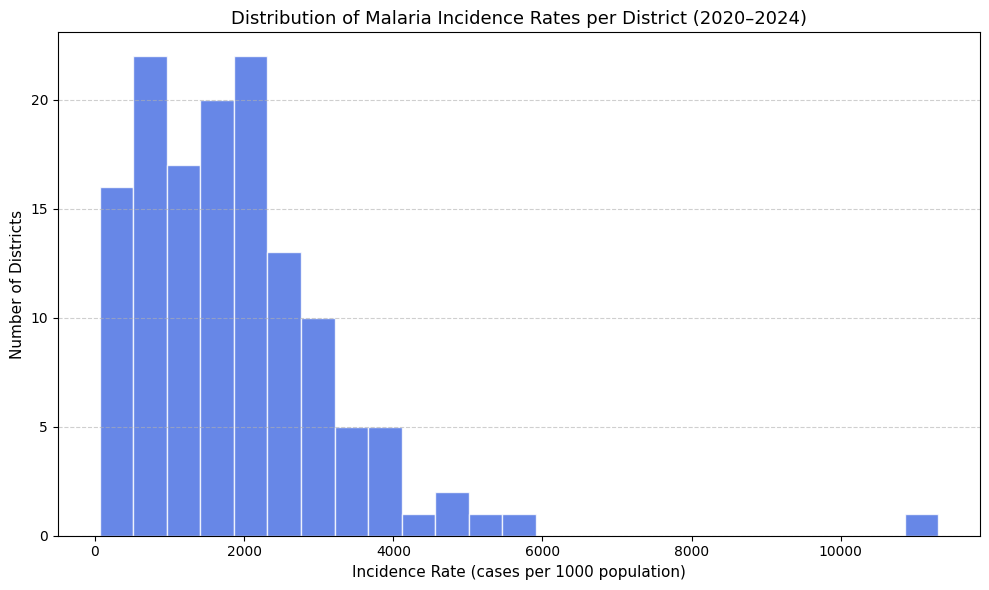

In [114]:
import matplotlib.pyplot as plt
import pandas as pd

# --- 1️⃣ Distribution of Malaria Incidence Rate per District ---
plt.figure(figsize=(10, 6))
plt.hist(district_data_clean['Incidence_Rate'], bins=25, color='royalblue', edgecolor='white', alpha=0.8)
plt.title('Distribution of Malaria Incidence Rates per District (2020–2024)', fontsize=13)
plt.xlabel('Incidence Rate (cases per 1000 population)', fontsize=11)
plt.ylabel('Number of Districts', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

####   Incidence rates by Region

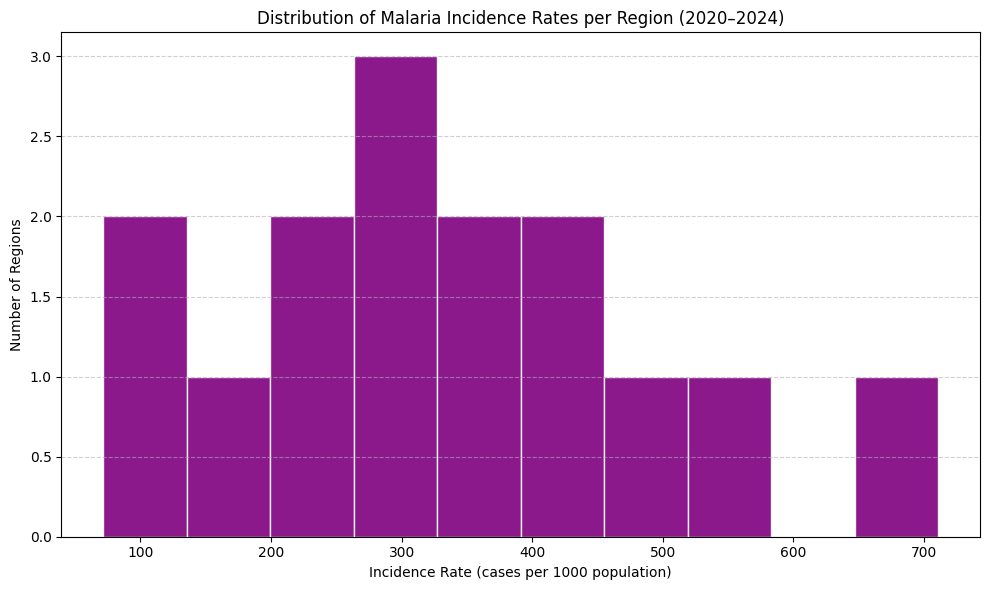

Number of Regions: 15
           Region  TOTAL CASES CONFIRMED(B/S & RDT)  TOTAL POPULATION  \
1          Acholi                        13670670.0      1.922948e+07   
15      West Nile                        18109220.0      3.260218e+07   
11  North Central                        11114266.0      2.259084e+07   
13           Teso                        10461422.0      2.319506e+07   
6          Busoga                        17349628.0      4.181038e+07   
10          Lango                         9472878.0      2.441662e+07   
8        Karamoja                         4887282.0      1.369994e+07   
4          Bukedi                         8864166.0      3.103765e+07   
14          Tooro                         7349864.0      2.595625e+07   
12  South Central                         7859550.0      2.847958e+07   

    Incidence_Rate  
1       710.922604  
15      555.460358  
11      491.981008  
13      451.019388  
6       414.959809  
10      387.968381  
8       356.737379  
4     

In [116]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Column names
region_col = 'Region'
cases_col = 'TOTAL CASES CONFIRMED(B/S & RDT)'
pop_col = 'TOTAL POPULATION'

# 1. Keep only rows where Region is NOT empty
region_only = master_df[master_df[region_col].notna()].copy()

# 2. Convert numeric fields safely
region_only[cases_col] = pd.to_numeric(region_only[cases_col], errors='coerce')
region_only[pop_col] = pd.to_numeric(region_only[pop_col], errors='coerce')

# 3. Aggregate by REGION
#    Summarize all districts under the same region
region_data = region_only.groupby(region_col).agg({
    cases_col: 'sum',      # Total malaria cases per region
    pop_col: 'sum'         # Combined population of all districts in region
}).reset_index()

# 4. Compute incidence rate per region
with np.errstate(divide='ignore', invalid='ignore'):
    region_data['Incidence_Rate'] = (region_data[cases_col] / region_data[pop_col]) * 1000

# 5. Remove regions with invalid values (0 population or NaNs)
region_data = region_data[np.isfinite(region_data['Incidence_Rate'])].copy()

# 6. Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(region_data['Incidence_Rate'], bins=10, color='purple', edgecolor='white', alpha=0.9)
plt.title('Distribution of Malaria Incidence Rates per Region (2020–2024)')
plt.xlabel('Incidence Rate (cases per 1000 population)')
plt.ylabel('Number of Regions')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 7. Diagnostics
print("Number of Regions:", len(region_data))
print(region_data.sort_values('Incidence_Rate', ascending=False).head(10))


In [117]:
# Get unique regions
unique_regions = master_df["Region"].dropna().unique()

# Display the result
print("Unique regions:")
print(unique_regions)

Unique regions:
['Karamoja' 'Acholi' 'West Nile' 'Lango' 'Teso' 'Ankole' 'Bukedi' 'Bugisu'
 'Busoga' 'North Central' 'South Central' 'Bunyoro' 'Tooro' 'Kigezi'
 'Kampala' 0]


## SPATIAL VISUALIZATIONS

In [ ]:
pip install splot

- 𝐬𝐩𝐥𝐨𝐭: provides publication-ready visualizations for spatial statistics (Moran scatterplots, LISA cluster maps, significance maps) and pairs naturally with geopandas, libpysal and esda to turn  incidence calculations into actionable spatial visualizations.

In [119]:
district_data_clean = district_data.dropna(subset=['Incidence_Rate', 'Latitude', 'Longitude']).copy()
district_data_clean = district_data_clean[district_data_clean['Incidence_Rate'].notnull()]
district_data_clean = district_data_clean[district_data_clean['Incidence_Rate'] != 0]  # optional if zeros cause issues


In [120]:
from libpysal.weights import KNN
w_knn = KNN.from_dataframe(gdf, k=5)  # 5 nearest neighbors


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\libpysal\weights\distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


## Comment about the Findings
-   - We tested whether malaria incidence rates across Ugandan districts show a global spatial pattern (i.e., whether high or low incidence districts cluster geographically). The Global Moran’s I statistic is close to zero (I = −0.0064) and not statistically significant (p ≈ 0.37).
   -  This means, at the national district scale and under the current spatial definition, there is no evidence of a single consistent nationwide cluster of high (or low) malaria incidence. Practically, this suggests malaria incidence is spatially heterogeneous and does not display a strong global clustering pattern — though local clusters (hotspots) may still exist and should be identified with local indicators.

## Obtaining and Preparing  Ugandas  District ShapeFile 

In [121]:
ug_map = r"D:\Data Analyst\PROJECTS DATA SCIENCE\MALARIA CASES\Uganda_Districts-2020---136-wgs84.shp"

In [123]:
shp_f = gpd.read_file(ug_map)

In [124]:
type(shp_f)

geopandas.geodataframe.GeoDataFrame

In [125]:
shp_f.shape

(136, 10)

In [126]:
shp_f.head()

,dname2019,d,total2020,ttotal2020,2010,2016,2017,2018,2020,geometry
0,MASAKA,Masaka,"335,700",335700.0,MASAKA,MASAKA,MASAKA,MASAKA,MASAKA,"POLYGON ((32.00051 -0.60761, 32.00053 -0.60993..."
1,BUTEBO,Butebo,"121,200",121200.0,PALLISA,BUTEBO,BUTEBO,BUTEBO,BUTEBO,"POLYGON ((33.87314 1.22742, 33.87306 1.22897, ..."
2,ALEBTONG,Alebtong,"266,100",266100.0,ALEBTONG,ALEBTONG,ALEBTONG,ALEBTONG,ALEBTONG,"POLYGON ((33.4429 2.36391, 33.44264 2.36336, 3..."
3,TORORO,Tororo,"597,500",597500.0,TORORO,TORORO,TORORO,TORORO,TORORO,"POLYGON ((33.97873 0.578, 33.97864 0.57808, 33..."
4,MOROTO,Moroto,"118,500",118500.0,MOROTO,MOROTO,MOROTO,MOROTO,MOROTO,"POLYGON ((34.83133 2.16438, 34.83133 2.16438, ..."


<Axes: >

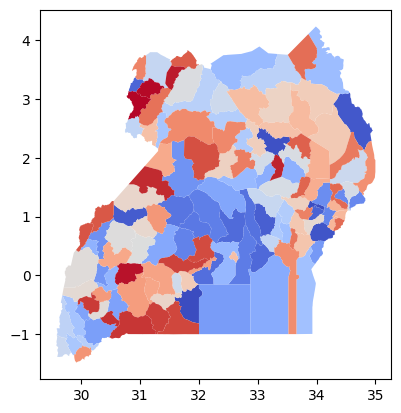

In [127]:
shp_f.plot(cmap = 'coolwarm')

## Merging Shape File Districts data with Our data 

In [129]:
import geopandas as gpd
import pandas as pd
import re
import unicodedata

# load shapefile
shp_path = r"D:\Data Analyst\PROJECTS DATA SCIENCE\MALARIA CASES\Uganda_Districts-2020---136-wgs84.shp"
gdf = gpd.read_file(shp_path)

# inspect key columns and CRS
print(gdf.columns)
print(gdf.shape)
print(gdf.crs)

Index(['dname2019', 'd', 'total2020', 'ttotal2020', '2010', '2016', '2017',
       '2018', '2020', 'geometry'],
      dtype='object')
(136, 10)
EPSG:4326


## Filtering only valid districts and leaving out regions  that were present in our district column

In [131]:
# keep only rows where your 'District' column contains the word "district"
district_data_districts = district_data_clean[
    district_data_clean['District'].str.contains(r'\bDISTRICT\b', case=False, na=False)
].copy()

# normalization function
def normalize_name(s):
    if pd.isna(s):
        return ""
    s = str(s).upper().strip()
    s = unicodedata.normalize("NFKD", s)
    s = re.sub(r"[^A-Z0-9\s\-]", "", s)
    s = re.sub(r"\b(DISTRICT|CITY|COUNTY|REGION|MUNICIPAL|MUNICIPALITY)\b", "", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

# create normalized name fields
shp_name_col = '2020'          # change if your shapefile uses a different column
gdf['NAME_NORM'] = gdf[shp_name_col].apply(normalize_name)
district_data_districts['DIST_NORM'] = district_data_districts['District'].apply(normalize_name)

### Perfoming  matching of the filtered valid districts in our original data with the available districts in the shape file 

In [132]:
# exact merge
gdf_merged = gdf.merge(
    district_data_districts,
    left_on='NAME_NORM',
    right_on='DIST_NORM',
    how='left',
    validate='one_to_many'
)

# inspect unmatched shapefile rows and unmatched data rows
unmatched_shapefile = gdf_merged[gdf_merged['District'].isna()]
print("Unmatched shapefile districts:", len(unmatched_shapefile))
print(unmatched_shapefile[shp_name_col].tolist()[:50])

# check data rows that did not match into shapefile (useful when data has > shapefile records)
matched_names = set(gdf_merged['DIST_NORM'].dropna().unique())
only_in_data = sorted(set(district_data_districts['DIST_NORM'].unique()) - matched_names)
print("Data-only (did not find a shapefile match):", len(only_in_data))
print(only_in_data[:50])

Unmatched shapefile districts: 2
['SSEMBABULE', 'MADI OKOLLO']
Data-only (did not find a shapefile match): 2
['MADI-OKOLLO', 'SEMBABULE']


## Interpretation
- Districts names  like [SSEMBABULE , MADI OKOLLO] in  the shape file didnt match with district  names in our data ['MADI-OKOLLO', 'SEMBABULE']
     - Because of spelling errors.
- 𝐍𝐄𝐗𝐓 𝐒𝐓𝐄𝐏: Merging Mis-Matched District Names [𝐒𝐒𝐄𝐌𝐁𝐀𝐁𝐔𝐋𝐄 , 𝐌𝐀𝐃𝐈 𝐎𝐊𝐎𝐋𝐋𝐎]
  

###  Matching mismatched District Names [𝐒𝐒𝐄𝐌𝐁𝐀𝐁𝐔𝐋𝐄 , 𝐌𝐀𝐃𝐈 𝐎𝐊𝐎𝐋𝐋𝐎]

In [133]:
# Inspect raw strings to be sure there are no invisible chars
print(gdf.loc[gdf['NAME_NORM'].str.contains('SSEMBABULE', na=False), 'NAME_NORM'].unique())
print(gdf.loc[gdf['NAME_NORM'].str.contains('MADI', na=False), 'NAME_NORM'].unique())
print(district_data_districts.loc[district_data_districts['DIST_NORM'].str.contains('MADI', na=False), 'DIST_NORM'].unique())

# Manual corrections dictionary
corrections = {
    "SSEMBABULE": "SEMBABULE",
    "MADI OKOLLO": "MADI-OKOLLO",   # if you prefer hyphenated form in your data
    "MADI-OKOLLO": "MADI OKOLLO"    # if you prefer space form in shapefile
}

# Apply corrections to the side you want to change. Example: fix shapefile NAME_NORM
gdf['NAME_NORM'] = gdf['NAME_NORM'].replace(corrections)

# Or, to fix your cleaned data instead, run:
# district_data_districts['DIST_NORM'] = district_data_districts['DIST_NORM'].replace(corrections)

# Re-run the merge using the normalized fields
gdf_merged = gdf.merge(
    district_data_districts,
    left_on='NAME_NORM',
    right_on='DIST_NORM',
    how='left',
    validate='one_to_many'
)

# Verify no unmatched rows remain for these cases
unmatched_shapefile = gdf_merged[gdf_merged['District'].isna()]
print("Unmatched shapefile districts:", len(unmatched_shapefile))
print(unmatched_shapefile[shp_name_col].tolist())

['SSEMBABULE']
['MADI OKOLLO']
['MADI-OKOLLO']
Unmatched shapefile districts: 0
[]


#### Comments
    - All districts are now matched respectively with the shape-file district names
- 𝐍𝐄𝐗𝐓 𝐒𝐓𝐄𝐏: Creation of Spatial Weights 
  

#  Create Appropriate Spatial Weights

## Spatial Weights  Relevance 
- 𝐃𝐞𝐟𝐢𝐧𝐢𝐭𝐢𝐨𝐧:  numeric representation of which geographic units influence each other and how strongly. They encode the neighborhood structure (who is a neighbor of whom) and let spatial statistics weight nearby observations when measuring spatial patterns.
- 𝐑𝐞𝐥𝐞𝐯𝐚𝐧𝐜𝐞:
   - They define the spatial context for every district so that measures of clustering reflect real local relationships.
   - Hot/cold-spot statistics (Local Moran’s I, Getis-Ord Gi*) use the weights to compare each district to its neighbors; different weight choices change which areas appear as hotspots or coldspots.
   - For malaria Descriptive Data Analysis, accurate weights will ensure interventions target true spatial clusters (transmission foci, persistent low-incidence pockets) rather than artifacts of arbitrary neighborhood definitions.
     - This ensures that control efforts are directed at real- high risk areas rather than misleading data patterns.
- 𝗡𝗢𝗧𝗘:
  - 𝐓𝐡𝐞 𝐆𝐞𝐭𝐢𝐬-𝐎𝐫𝐝 𝐆𝐢* 𝐬𝐭𝐚𝐭𝐢𝐬𝐭𝐢𝐜 is a spatial analysis tool used to identify statistically significant clusters of 𝐡𝐢𝐠𝐡 𝐯𝐚𝐥𝐮𝐞𝐬 (𝐡𝐨𝐭 𝐬𝐩𝐨𝐭𝐬) and 𝐥𝐨𝐰 𝐯𝐚𝐥𝐮𝐞𝐬 (𝐜𝐨𝐥𝐝 𝐬𝐩𝐨𝐭𝐬)
 in a dataset. It evaluates each feature in the context of its neighboring features, providing a localized 𝐳-𝐬𝐜𝐨𝐫𝐞 and 𝐩-𝐯𝐚𝐥𝐮𝐞 for every data point.  Areas with a statistically significant concentration of high infection rates (hot spots).
  - 𝐓𝐡𝐞 𝐋𝐨𝐜𝐚𝐥 𝐦𝐨𝐫𝐚𝐧 𝐈𝐧𝐝𝐞𝐱 is  a statistic used to identify statistically significant clusters and outliers at a local level.
    Helps in understanding boundaries of high and low level areas (𝐁𝐨𝐮𝐧𝐝𝐚𝐫𝐢𝐞𝐬 𝐨𝐟 𝐇𝐨𝐭𝐬𝐩𝐨𝐭𝐬 𝐚𝐧𝐝 𝐂𝐨𝐥𝐝 𝐬𝐩𝐨𝐭𝐬)
  - 𝐓𝐡𝐞 𝐆𝐥𝐨𝐛𝐚𝐥 𝐌𝐨𝐫𝐚𝐧 𝐈𝐧𝐝𝐞𝐱: provides a single, summary value to describe the overall spatial autocorrelation for an entire study area

In [134]:
from libpysal.weights import Queen, KNN, W
# Option 1: Queen contiguity (shared borders)
w_queen = Queen.from_dataframe(gdf_merged)
print(f"Queen contiguity: {w_queen.n} units, {w_queen.nonzero} links")

# Option 2: K-nearest neighbors (for islands or non-contiguous areas)
w_knn = KNN.from_dataframe(gdf_merged, k=5)
print(f"KNN weights: {w_knn.n} units, {w_knn.nonzero} links")

# Check for islands (districts with no neighbors)

islands = [i for i, nbrs in w_queen.neighbors.items() if len(nbrs) == 0]
if islands:
    print(f"{len(islands)} islands found. Using KNN weights for these districts.")
    # Create a hybrid weights matrix
    w_hybrid = w_queen
    for island in islands:
        w_hybrid.neighbors[island] = w_knn.neighbors[island]
    w = w_hybrid
else:
    w = w_queen

w.transform = 'r'  # Row-standardize

C:\Users\User\AppData\Local\Temp\ipykernel_7088\2843879156.py:3: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen = Queen.from_dataframe(gdf_merged)


Queen contiguity: 136 units, 694 links
KNN weights: 136 units, 680 links
1 islands found. Using KNN weights for these districts.
('WARNING: ', 124, ' is an island (no neighbors)')


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There is 1 island with id: 124.
  W.__init__(self, neighbors, ids=ids, **kw)


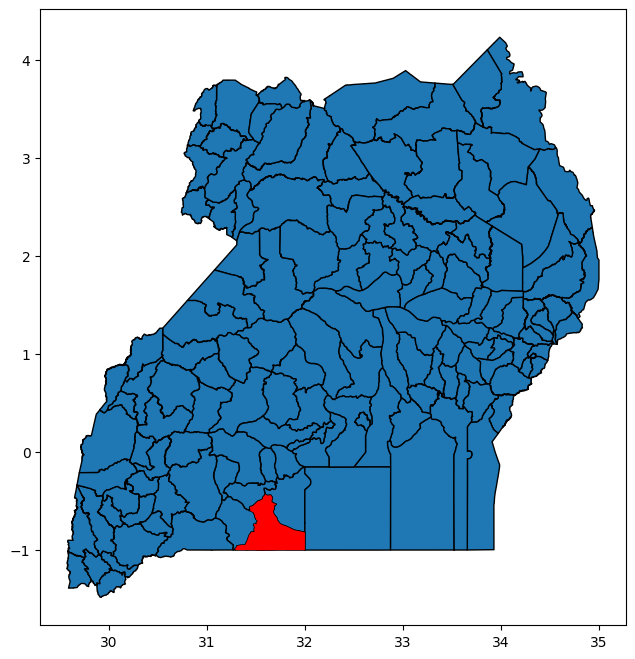

In [135]:
import matplotlib.pyplot as plt
gdf_merged.assign(component = gdf_merged.geometry.apply(lambda g: g))  # just plot
gdf_merged.plot(edgecolor='black', figsize=(8,8))
gdf_merged.iloc[[124]].plot(color='red', ax=plt.gca())  # highlight island by index
plt.show()

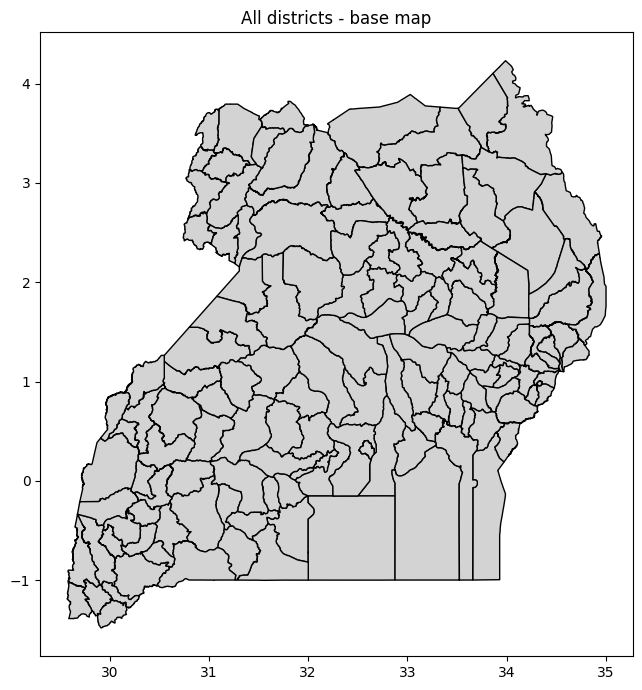

CRS: EPSG:4326
Any invalid geometries: False
Invalid geometry indices: []


In [136]:
import geopandas as gpd
import matplotlib.pyplot as plt

# gdf_merged: GeoDataFrame with merged case/population columns and geometry
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
gdf_merged.plot(ax=ax, color='lightgrey', edgecolor='black')
ax.set_title("All districts - base map")
plt.tight_layout()
plt.show()

# quick check of geometry validity
print("CRS:", gdf_merged.crs)
print("Any invalid geometries:", (~gdf_merged.is_valid).any())
invalid_idx = gdf_merged[~gdf_merged.is_valid].index.tolist()
print("Invalid geometry indices:", invalid_idx)

Islands (no contiguity neighbors): [124]
Number of connected components: 2
 Component 1: 134 units; sample ids: [0, 1, 2, 3, 4, 5, 6, 7]
 Component 2: 2 units; sample ids: [134, 135]
Largest component size: 134


C:\Users\User\AppData\Local\Temp\ipykernel_16176\4113003054.py:33: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  w_hybrid = W(neighbors_hybrid, ids=ids)


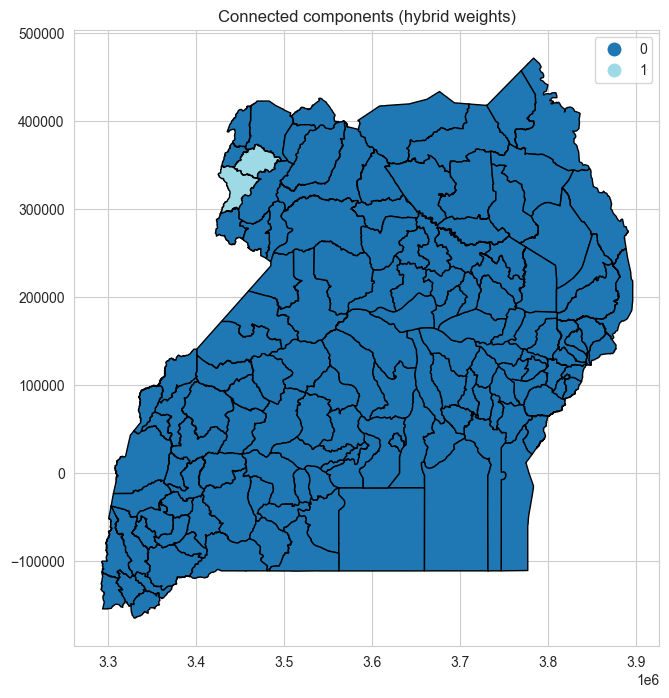

g_largest rows: 134


In [126]:
# Fix weights, compute components, inspect and (optionally) subset to largest component
import geopandas as gpd
import numpy as np
from libpysal.weights import Queen, KNN, W
import networkx as nx
import matplotlib.pyplot as plt

# Work on a copy
g = gdf_merged.copy()

# 0. Reproject to a metric CRS (meters). Replace epsg if you have a local UTM for Uganda.
if g.crs is None or g.crs.to_epsg() == 4326:
    g = g.to_crs(epsg=3857)

# 1. Fix invalid geometries
g['geometry'] = g['geometry'].buffer(0)

# 2. Build Queen and KNN; set use_index=True to silence future warning and ensure ids match g.index
wq = Queen.from_dataframe(g, use_index=True)
wknn = KNN.from_dataframe(g, k=5, use_index=True)

# 3. Find islands (no neighbors) and patch them from KNN into Queen -> hybrid
islands = [i for i, nbrs in wq.neighbors.items() if len(nbrs) == 0]
print("Islands (no contiguity neighbors):", islands)

# make a shallow copy of neighbors dict to avoid mutating original unexpectedly
neighbors_hybrid = {k: list(v) for k, v in wq.neighbors.items()}
for i in islands:
    neighbors_hybrid[i] = list(wknn.neighbors[i])

# create a libpysal.weights.W object from the hybrid neighbors
ids = list(neighbors_hybrid.keys())
w_hybrid = W(neighbors_hybrid, ids=ids)
w_hybrid.transform = 'r'

# 4. Compute connected components using networkx (neighbors are keys -> edges)
G = nx.Graph()
for i, nbrs in w_hybrid.neighbors.items():
    for j in nbrs:
        G.add_edge(i, j)
# ensure isolated nodes are present
for i in w_hybrid.neighbors.keys():
    if i not in G:
        G.add_node(i)

components = list(nx.connected_components(G))
components_sorted = sorted(components, key=lambda c: len(c), reverse=True)
print("Number of connected components:", len(components_sorted))
for idx, comp in enumerate(components_sorted):
    print(f" Component {idx+1}: {len(comp)} units; sample ids:", sorted(list(comp))[:8])

# 5. Optionally: isolate the largest component for analysis (avoid mixing disconnected groups)
largest_comp = components_sorted[0]
print("Largest component size:", len(largest_comp))

g['component_id'] = g.index.map(lambda i: next((k for k,v in enumerate(components_sorted) if i in v), -1))

# Plot components to visualise
fig, ax = plt.subplots(1,1, figsize=(10,8))
g.plot(column='component_id', categorical=True, cmap='tab20', legend=True, ax=ax, edgecolor='black')
ax.set_title("Connected components (hybrid weights)")
plt.show()

# 6. If you want to continue analysis on the largest connected component only:
g_largest = g.loc[sorted(largest_comp)].copy()
print("g_largest rows:", len(g_largest))

# Next steps hint (run after verifying components):
# - compute metrics (Incidence_Rate etc) on g or g_largest
# - run Moran_Local and G_Local using w_hybrid restricted to the same ids as g_largest
#
# Example: build a weight object restricted to g_largest indices (if needed)
# subset_ids = sorted(largest_comp)
# neighbors_subset = {i: [j for j in w_hybrid.neighbors[i] if j in subset_ids] for i in subset_ids}
# w_subset = W(neighbors_subset, ids=subset_ids)
# w_subset.transform = 'r'

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There is 1 island with id: 124.
  W.__init__(self, neighbors, ids=ids, **kw)
C:\Users\User\AppData\Local\Temp\ipykernel_7088\2227516313.py:45: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  w_hybrid = W(neighbors_hybrid, ids=ids)


Islands (no contiguity neighbors): [124]
Number of connected components: 2
 Component 1: 134 units (example indices): [0, 1, 2, 3, 4, 5, 6, 7]
 Component 2: 2 units (example indices): [134, 135]

Global Moran I results
 I       : 0.5199706469898622
 z-score : 9.786678934092151
 p-value : 0.001

Significant LISA clusters: High-High (HH)=13, Low-Low (LL)=22, total significant=39


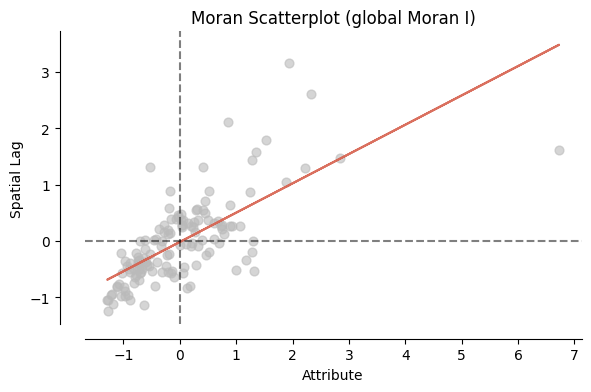

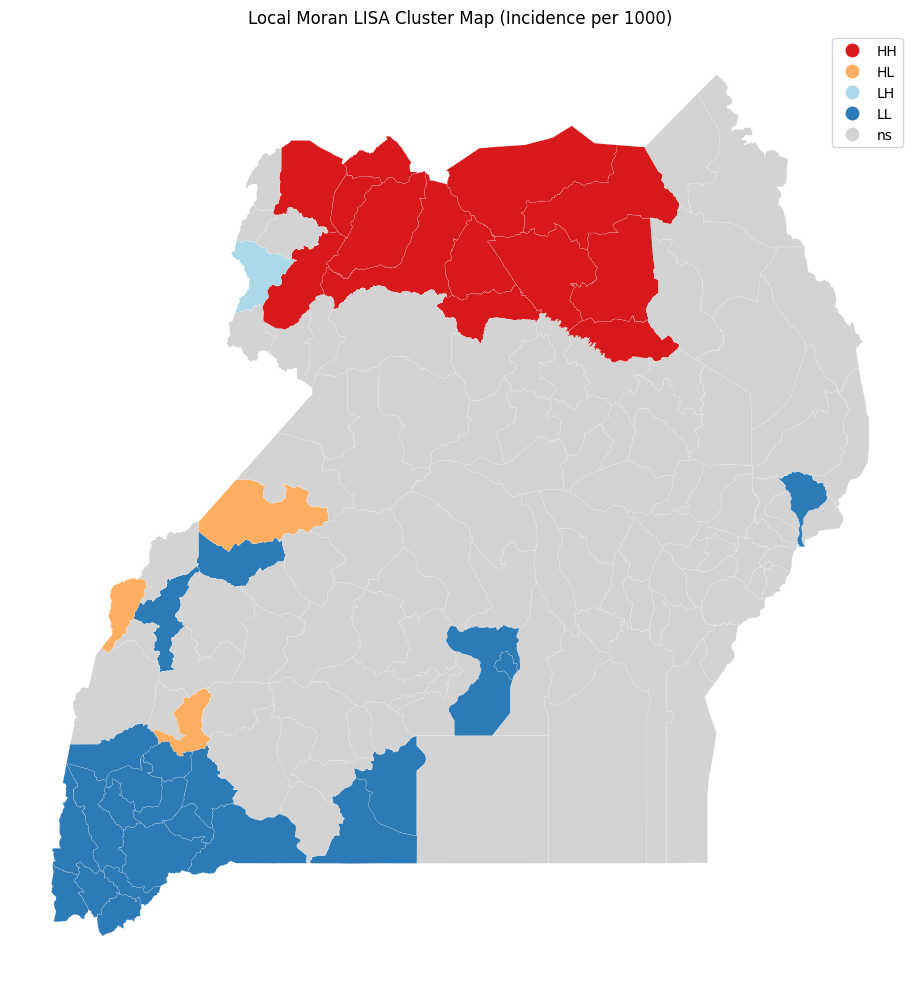

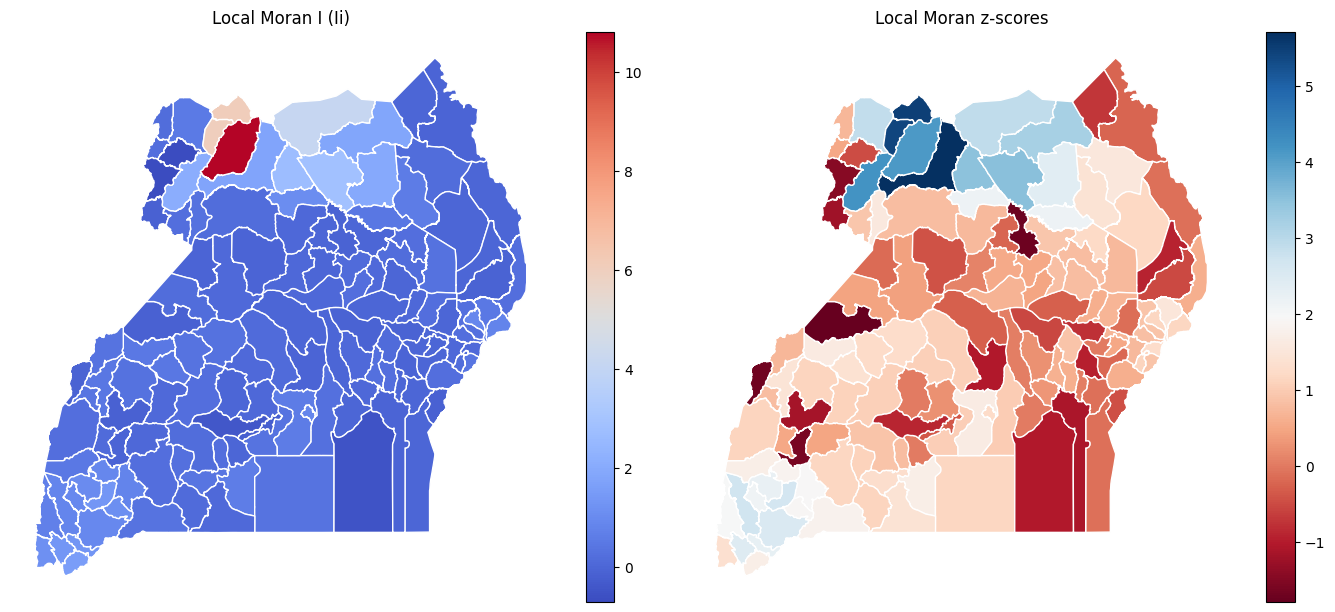

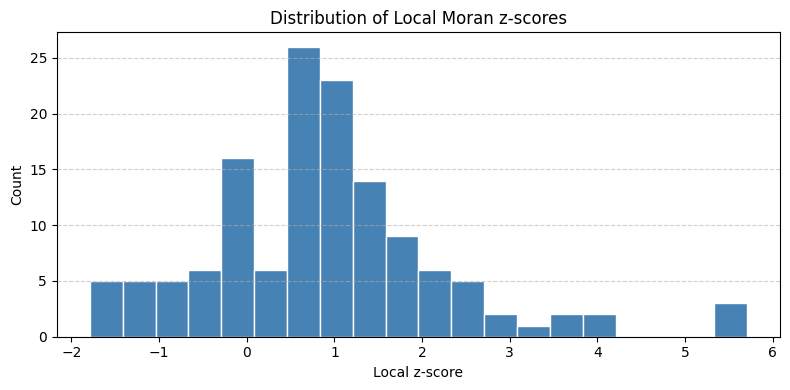

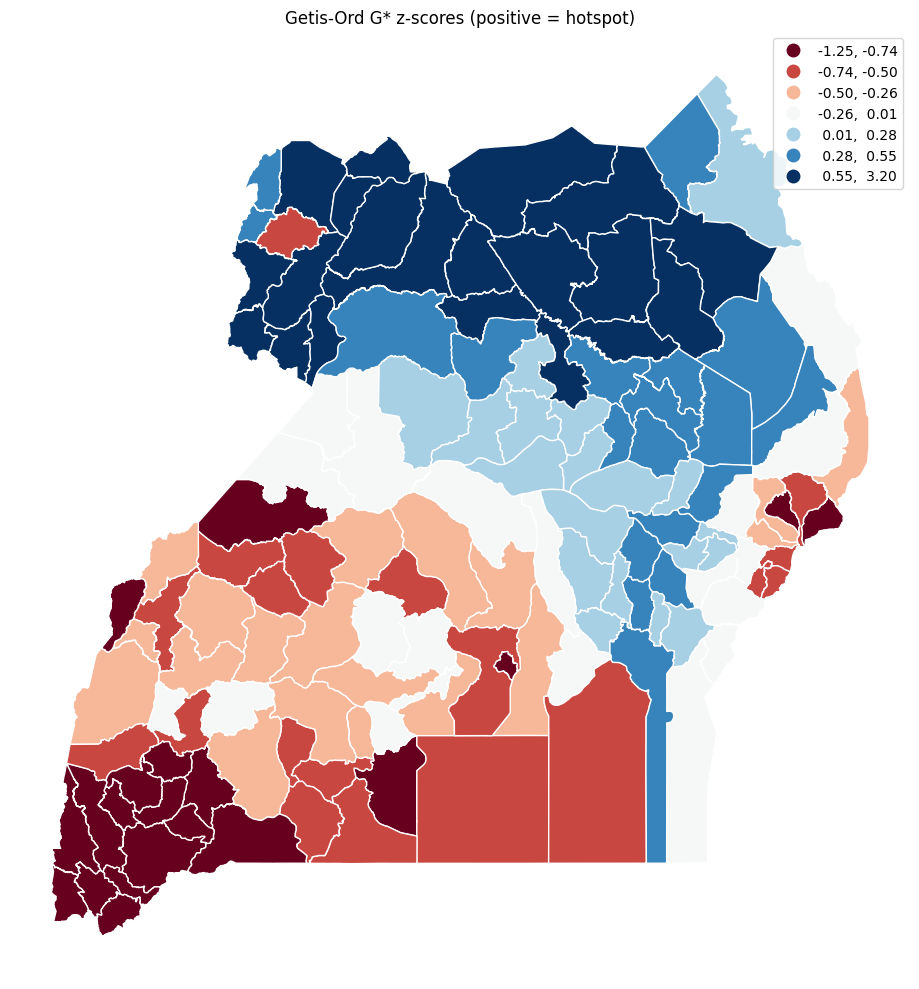

C:\Users\User\AppData\Local\Temp\ipykernel_7088\2227516313.py:150: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
C:\Users\User\AppData\Local\Temp\ipykernel_7088\2227516313.py:150: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


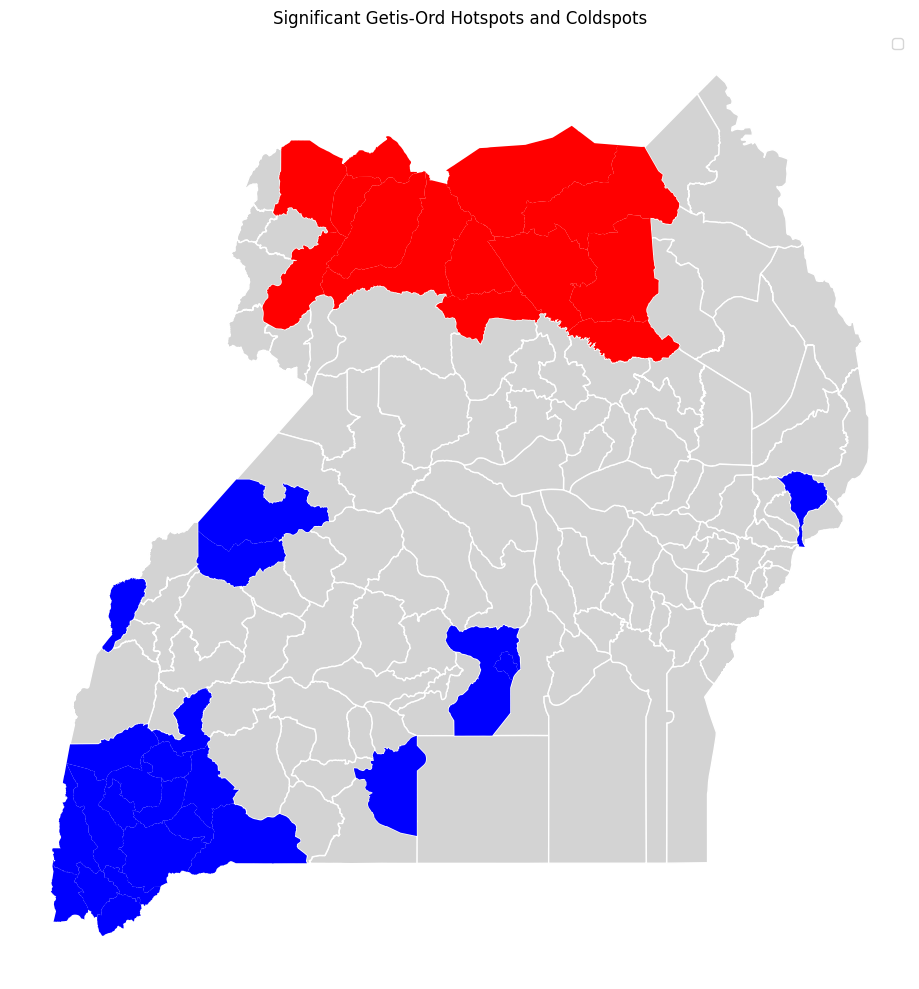

Exported: uganda_district_metrics_with_spatial_stats.csv


In [137]:
# Full robust LISA + G* workflow (single runnable cell)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import splot.esda as splot_esda
from esda.moran import Moran, Moran_Local
from esda.getisord import G_Local
from libpysal.weights import Queen, KNN, W
import networkx as nx

# --- 0. Input objects (assumptions) ---
# gdf_merged : original merged GeoDataFrame (has geometry and incidence/pop columns)
# You should have already created incidence column 'Incidence_Rate_per_1000'
# If not, compute it before this cell:
# gdf_merged['Incidence_Rate_per_1000'] = (gdf_merged[cases_col].astype(float) / gdf_merged[pop_col].astype(float)) * 1000

# Work on a copy and ensure proper CRS (metric) for KNN distances
g = gdf_merged.copy()
if g.crs is None or (hasattr(g.crs, "to_epsg") and g.crs.to_epsg() == 4326):
    g = g.to_crs(epsg=3857)

# Fix invalid geometries
g['geometry'] = g['geometry'].buffer(0)

# Ensure incidence exists and is numeric
inc_col = 'Incidence_Rate'
if inc_col not in g.columns:
    raise KeyError(f"Column '{inc_col}' not found. Compute incidence before running this cell.")
g[inc_col] = pd.to_numeric(g[inc_col], errors='coerce')

# --- 1. Build hybrid weights (Queen with KNN fallback) using use_index=True ---
wq = Queen.from_dataframe(g, use_index=True)
wknn = KNN.from_dataframe(g, k=5, use_index=True)

# patch islands
islands = [i for i, nbrs in wq.neighbors.items() if len(nbrs) == 0]
if islands:
    print("Islands (no contiguity neighbors):", islands)
neighbors_hybrid = {k: list(v) for k, v in wq.neighbors.items()}
for i in islands:
    neighbors_hybrid[i] = list(wknn.neighbors[i])

# create W object explicitly and row-standardize
ids = list(neighbors_hybrid.keys())
w_hybrid = W(neighbors_hybrid, ids=ids)
w_hybrid.transform = 'r'

# --- 2. Compute connected components from hybrid weights ---
G_graph = nx.Graph()
for i, nbrs in w_hybrid.neighbors.items():
    for j in nbrs:
        G_graph.add_edge(i, j)
for i in w_hybrid.neighbors.keys():
    if i not in G_graph:
        G_graph.add_node(i)

components = sorted(list(nx.connected_components(G_graph)), key=lambda c: len(c), reverse=True)
print("Number of connected components:", len(components))
for idx, comp in enumerate(components):
    print(f" Component {idx+1}: {len(comp)} units (example indices):", sorted(list(comp))[:8])

# Option: restrict analysis to largest connected component to make global tests valid
restrict_to_largest = False   # set True to analyze only largest component
if restrict_to_largest:
    largest = sorted(components[0])
    g = g.loc[largest].copy()
    # rebuild weights restricted to subset ids
    neighbors_subset = {i: [j for j in neighbors_hybrid[i] if j in largest] for i in largest}
    w_hybrid = W(neighbors_subset, ids=sorted(neighbors_subset.keys()))
    w_hybrid.transform = 'r'
    print("Restricted analysis to largest component with", len(largest), "units.")

# --- 3. Prepare y vector safely ---
y = g[inc_col].replace([np.inf, -np.inf], np.nan).fillna(0).values

# --- 4. Global Moran I (print summary) ---
moran_global = Moran(y, w_hybrid)
print("\nGlobal Moran I results")
print(" I       :", moran_global.I)
print(" z-score :", moran_global.z_sim)
print(" p-value :", moran_global.p_sim)

# --- 5. Local Moran (LISA) and store statistics on GeoDataFrame ---
lisa = Moran_Local(y, w_hybrid)
g['local_I'] = lisa.Is
g['local_z'] = lisa.z_sim
g['local_p'] = lisa.p_sim
g['lisa_q'] = lisa.q                # 1=HH,2=LH,3=LL,4=HL
g['lisa_sig'] = lisa.p_sim < 0.05

# counts of significant clusters
hh_count = ((g['lisa_q'] == 1) & g['lisa_sig']).sum()
ll_count = ((g['lisa_q'] == 3) & g['lisa_sig']).sum()
print(f"\nSignificant LISA clusters: High-High (HH)={hh_count}, Low-Low (LL)={ll_count}, total significant={g['lisa_sig'].sum()}")

# --- 6. Moran scatterplot (global) ---
fig, ax = plt.subplots(figsize=(6,6))
splot_esda.moran_scatterplot(moran_global, ax=ax)
ax.set_title('Moran Scatterplot (global Moran I)')
plt.tight_layout()
plt.show()

# --- 7. LISA cluster map (categorical) ---
fig, ax = plt.subplots(1, 1, figsize=(10,10))
splot_esda.lisa_cluster(lisa, g, p=0.05, ax=ax, legend=True)
ax.set_title('Local Moran LISA Cluster Map (Incidence per 1000)')
plt.tight_layout()
plt.show()

# --- 8. Local I and z-score choropleths ---
fig, axes = plt.subplots(1, 2, figsize=(14,6))
g.plot(column='local_I', cmap='coolwarm', legend=True, ax=axes[0], edgecolor='white')
axes[0].set_title('Local Moran I (Ii)')
g.plot(column='local_z', cmap='RdBu', legend=True, ax=axes[1], edgecolor='white')
axes[1].set_title('Local Moran z-scores')
for ax in axes: ax.axis('off')
plt.tight_layout()
plt.show()

# --- 9. LISA local z histogram (diagnostic) ---
plt.figure(figsize=(8,4))
plt.hist(g['local_z'].dropna(), bins=20, color='steelblue', edgecolor='white')
plt.title('Distribution of Local Moran z-scores')
plt.xlabel('Local z-score')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- 10. Getis-Ord G* (local G) and hotspot maps ---
g_local = G_Local(y, w_hybrid)
g['G_z'] = g_local.Zs
g['G_p'] = g_local.p_sim
g['G_hot'] = (g['G_z'] > 0) & (g['G_p'] < 0.05)
g['G_cold'] = (g['G_z'] < 0) & (g['G_p'] < 0.05)

# G* z-score choropleth
fig, ax = plt.subplots(1,1, figsize=(10,10))
g.plot(column='G_z', cmap='RdBu', scheme='quantiles', k=7, legend=True, ax=ax, edgecolor='white')
ax.set_title('Getis-Ord G* z-scores (positive = hotspot)')
ax.axis('off')
plt.tight_layout()
plt.show()

# Significant hotspots/coldspots overlay
fig, ax = plt.subplots(1,1, figsize=(10,10))
g.plot(color='lightgrey', edgecolor='white', ax=ax)
g[g['G_hot']].plot(color='red', ax=ax, label='Hotspot (G*, p<0.05)')
g[g['G_cold']].plot(color='blue', ax=ax, label='Coldspot (G*, p<0.05)')
ax.legend()
ax.set_title('Significant Getis-Ord Hotspots and Coldspots')
ax.axis('off')
plt.tight_layout()
plt.show()

# --- 11. Export dataset for Power BI (CSV without geometry) ---
export_df = g.drop(columns='geometry').copy()
export_csv = "uganda_district_metrics_with_spatial_stats.csv"
export_df.to_csv(export_csv, index=False)
print(f"Exported: {export_csv}")

In [118]:
gdf_merged = gdf_merged.to_crs(epsg=3857)   # or a suitable local projection
gdf_merged['geometry'] = gdf_merged['geometry'].buffer(0)  # often fixes topology issues

## Step 4: Calculate Moran's I with Proper Weights

In [138]:
from libpysal.weights import Queen, KNN, W
from esda import Moran

# 1. Subset the GeoDataFrame to observations with Incidence_Rate
valid_mask = gdf_merged['Incidence_Rate'].notna()
gdf_valid = gdf_merged.loc[valid_mask].copy()

# 2. Build Queen weights on the subset (use_index=True to align IDs to the GeoDataFrame index)
wq = Queen.from_dataframe(gdf_valid, use_index=True)

# 3. If islands exist, replace their neighbors with KNN neighbors to create a hybrid
if getattr(wq, "islands", None):
    wknn = KNN.from_dataframe(gdf_valid, k=5, use_index=True)
    neighbors = dict(wq.neighbors)              # copy neighbors dict
    for isl in wq.islands:
        neighbors[isl] = wknn.neighbors[isl]    # give island KNN neighbors
    w_subset = W(neighbors, ids=list(gdf_valid.index))
else:
    w_subset = wq

# 4. Row-standardize and verify alignment
w_subset.transform = 'r'
assert list(w_subset.id_order) == list(gdf_valid.index), "IDs not aligned; check use_index=True"

# 5. Compute Moran's I with permutations
y = gdf_valid['Incidence_Rate'].to_numpy()
moran = Moran(y, w_subset, permutations=999)

print(f"Moran's I: {moran.I:.4f}")
print(f"Expected I: {moran.EI:.4f}")
print(f"Z-score: {moran.z_sim:.4f}")
print(f"P-value (permutation): {moran.p_sim:.6f}")

Moran's I: 0.5200
Expected I: -0.0074
Z-score: 10.0895
P-value (permutation): 0.001000


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There is 1 island with id: 124.
  W.__init__(self, neighbors, ids=ids, **kw)
C:\Users\User\AppData\Local\Temp\ipykernel_7088\3073100916.py:17: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  w_subset = W(neighbors, ids=list(gdf_valid.index))


#    Results Interpretaton

- 𝐑𝐞𝐬𝐮𝐥𝐭𝐬 𝐑𝐞𝐜𝐚𝐩:
   - Moran’s I: 0.5200
   - Expected I (under spatial randomness): ~ –0.0074
   - Z-score: 10.13
   - Permutation p-value: 0.001 (significant at 0.1%)
- 𝐒𝐮𝐦𝐦𝐚𝐫𝐲:
    - The  Global Moran’s I analysis shows significant and 𝐬𝐭𝐫𝐨𝐧𝐠 𝐬𝐩𝐚𝐭𝐢𝐚𝐥 𝐜𝐥𝐮𝐬𝐭𝐞𝐫𝐢𝐧𝐠 (𝐈 = 𝟎.𝟓𝟐, 𝐩 < 𝟎.𝟎𝟎𝟏) of malaria incidence in Uganda.
    -  Malaria is not randomly spread — it forms 𝐠𝐞𝐨𝐠𝐫𝐚𝐩𝐡𝐢𝐜𝐚𝐥𝐥𝐲 𝐜𝐨𝐧𝐭𝐢𝐠𝐮𝐨𝐮𝐬 𝐜𝐥𝐮𝐬𝐭𝐞𝐫𝐬 𝐨𝐟 𝐡𝐢𝐠𝐡 𝐚𝐧𝐝 𝐥𝐨𝐰 𝐛𝐮𝐫𝐝𝐞𝐧. This validates the use of spatially targeted malaria interventions at cluster or regional levels, rather than uniform national strategies.
      
📖 𝐈𝐧𝐭𝐞𝐫𝐩𝐫𝐞𝐭𝐚𝐭𝐢𝐨𝐧
1. 𝐏𝐨𝐬𝐢𝐭𝐢𝐯𝐞 𝐚𝐧𝐝 𝐒𝐭𝐫𝐨𝐧𝐠 𝐒𝐩𝐚𝐭𝐢𝐚𝐥 𝐀𝐮𝐭𝐨𝐜𝐨𝐫𝐫𝐞𝐥𝐚𝐭𝐢𝐨𝐧
   - Moran’s I ranges from –𝟏 (𝐩𝐞𝐫𝐟𝐞𝐜𝐭 𝐝𝐢𝐬𝐩𝐞𝐫𝐬𝐢𝐨𝐧) → 𝟎 (𝐫𝐚𝐧𝐝𝐨𝐦) → +𝟏 (𝐩𝐞𝐫𝐟𝐞𝐜𝐭 𝐜𝐥𝐮𝐬𝐭𝐞𝐫𝐢𝐧𝐠).
   - Our  Moran’s 𝐈 = 𝟎.𝟓𝟐, which is 𝐯𝐞𝐫𝐲 𝐡𝐢𝐠𝐡 for epidemiological data.
  - This means malaria incidence rates are 𝐧𝐨𝐭 𝐫𝐚𝐧𝐝𝐨𝐦𝐥𝐲 𝐝𝐢𝐬𝐭𝐫𝐢𝐛𝐮𝐭𝐞𝐝. Instead, 𝐝𝐢𝐬𝐭𝐫𝐢𝐜𝐭𝐬 𝐰𝐢𝐭𝐡 𝐡𝐢𝐠𝐡 𝐦𝐚𝐥𝐚𝐫𝐢𝐚 𝐢𝐧𝐜𝐢𝐝𝐞𝐧𝐜𝐞 𝐭𝐞𝐧𝐝 𝐭𝐨 𝐛𝐞 𝐧𝐞𝐚𝐫 𝐨𝐭𝐡𝐞𝐫 𝐡𝐢𝐠𝐡-𝐢𝐧𝐜𝐢𝐝𝐞𝐧𝐜𝐞 𝐝𝐢𝐬𝐭𝐫𝐢𝐜𝐭𝐬, and 𝐥𝐨𝐰 𝐧𝐞𝐚𝐫 𝐥𝐨𝐰.

2.𝐒𝐭𝐚𝐭𝐢𝐬𝐭𝐢𝐜𝐚𝐥 𝐒𝐢𝐠𝐧𝐢𝐟𝐢𝐜𝐚𝐧𝐜𝐞
   - The Z-score (𝟏𝟎.𝟏𝟑) is far above the usual critical values (e.g., ±1.96 at 95% confidence).
   - The permutation p-value (𝟎.𝟎𝟎𝟏)
 confirms this clustering is e𝐞𝐱𝐭𝐫𝐞𝐦𝐞𝐥𝐲 𝐮𝐧𝐥𝐢𝐤𝐞𝐥𝐲 𝐭𝐨 𝐨𝐜𝐜𝐮𝐫 𝐛𝐲 𝐜𝐡𝐚𝐧𝐜𝐞.
   - We can confidently reject the null hypothesis of spatial randomness.

3. 𝐃𝐢𝐬𝐜𝐨𝐧𝐧𝐞𝐜𝐭𝐞𝐝 𝐂𝐨𝐦𝐩𝐨𝐧𝐞𝐧𝐭𝐬 𝐖𝐚𝐫𝐧𝐢𝐧𝐠

    - The warning indicates your spatial weights (Queen contiguity) produced 𝐭𝐰𝐨 𝐬𝐞𝐩𝐚𝐫𝐚𝐭𝐞 𝐜𝐨𝐧𝐧𝐞𝐜𝐭𝐞𝐝 𝐚𝐫𝐞𝐚𝐬 — likely due to 𝐝𝐢𝐬𝐭𝐫𝐢𝐜𝐭𝐬 𝐰𝐢𝐭𝐡 𝐧𝐨 𝐬𝐡𝐚𝐫𝐞𝐝 𝐛𝐨𝐫𝐝𝐞𝐫𝐬(islands like Kalangala or boundary errors).

   - We  handled this by hybridizing with 𝐊𝐍𝐍 𝐧𝐞𝐢𝐠𝐡𝐛𝐨𝐫𝐬, so the analysis remains valid.

𝐍𝐎𝐓𝐄:
 -  Disconnected areas(𝐢𝐬𝐥𝐚𝐧𝐝𝐬 𝐥𝐢𝐤𝐞 𝐊𝐚𝐥𝐚𝐧𝐠𝐚𝐥𝐚) may behave slightly differently and should be checked in the Local Moran analysis.

📊 𝐏𝐫𝐨𝐟𝐞𝐬𝐬𝐢𝐨𝐧𝐚𝐥 𝐎𝐛𝐬𝐞𝐫𝐯𝐚𝐭𝐢𝐨𝐧𝐬:
   - The results confirm strong clustering of malaria burden across Ugandan districts.

 - 𝐈𝐧 𝐩𝐫𝐚𝐜𝐭𝐢𝐜𝐞:
    -  𝐇𝐨𝐭𝐬𝐩𝐨𝐭 𝐝𝐢𝐬𝐭𝐫𝐢𝐜𝐭𝐬 (𝐇𝐢𝐠𝐡-𝐇𝐢𝐠𝐡) are forming contiguous belts (likely in the northern, eastern, or western regions depending on your dataset).
    -  𝐂𝐨𝐥𝐝𝐬𝐩𝐨𝐭𝐬 (𝐋𝐨𝐰-𝐋𝐨𝐰) indicate districts where malaria incidence is consistently lower and geographically concentrated.

-  The fact that the clustering is so strong (I = 0.52) suggests that 𝐧𝐞𝐢𝐠𝐡𝐛𝐨𝐫𝐢𝐧𝐠 𝐝𝐢𝐬𝐭𝐫𝐢𝐜𝐭𝐬 𝐢𝐧𝐟𝐥𝐮𝐞𝐧𝐜𝐞 𝐞𝐚𝐜𝐡 𝐨𝐭𝐡𝐞𝐫’𝐬 𝐦𝐚𝐥𝐚𝐫𝐢𝐚 𝐨𝐮𝐭𝐜𝐨𝐦𝐞𝐬 — whether through environmental factors (rainfall, wetlands, altitude), socio-economic conditions, or health system coverage.

✅ 𝐏𝐨𝐥𝐢𝐜𝐲 & 𝐀𝐜𝐭𝐢𝐨𝐧𝐚𝐛𝐥𝐞 𝐑𝐞𝐜𝐨𝐦𝐦𝐞𝐧𝐝𝐚𝐭𝐢𝐨𝐧𝐬 𝐟𝐨𝐫 𝐭𝐡𝐞 𝐌𝐢𝐧𝐢𝐬𝐭𝐫𝐲 𝐨𝐟 𝐇𝐞𝐚𝐥𝐭𝐡

1.  𝐓𝐚𝐫𝐠𝐞𝐭𝐞𝐝 𝐈𝐧𝐭𝐞𝐫𝐯𝐞𝐧𝐭𝐢𝐨𝐧𝐬 𝐢𝐧 𝐇𝐨𝐭𝐬𝐩𝐨𝐭 𝐂𝐥𝐮𝐬𝐭𝐞𝐫𝐬
     -  Intensify IRS (Indoor Residual Spraying), LLIN distribution, and larval source management in districts that are part of 𝐡𝐢𝐠𝐡-𝐡𝐢𝐠𝐡 𝐜𝐥𝐮𝐬𝐭𝐞𝐫𝐬.
     -  Because malaria risk is spatially clustered, treating whole contiguous clusters will likely be more effective than district-by-district isolated efforts.

2. 𝐈𝐧𝐯𝐞𝐬𝐭𝐢𝐠𝐚𝐭𝐞 𝐂𝐨𝐥𝐝𝐬𝐩𝐨𝐭𝐬
    - Districts consistently identified as 𝐥𝐨𝐰-𝐥𝐨𝐰 𝐜𝐥𝐮𝐬𝐭𝐞𝐫𝐬 could provide insights: better health service coverage? Stronger community uptake of prevention? Environmental advantages? 
    - Lessons from these districts could be applied elsewhere.

3. 𝐎𝐮𝐭𝐥𝐢𝐞𝐫 𝐃𝐢𝐬𝐭𝐫𝐢𝐜𝐭𝐬
  - Local Moran’s I (next step) will reveal outliers (e.g., a high-incidence district surrounded by low-incidence ones). These need localized investigations — often caused by unique micro-environments (swamps, refugee settlements, sugarcane plantations).

4. 𝐅𝐮𝐭𝐮𝐫𝐞 𝐒𝐮𝐫𝐯𝐞𝐢𝐥𝐥𝐚𝐧𝐜𝐞
     -  Since clustering is strong, 𝐫𝐞𝐠𝐢𝐨𝐧𝐚𝐥 𝐨𝐫 𝐜𝐫𝐨𝐬𝐬-𝐝𝐢𝐬𝐭𝐫𝐢𝐜𝐭 𝐦𝐚𝐥𝐚𝐫𝐢𝐚 𝐜𝐨𝐧𝐭𝐫𝐨𝐥 𝐬𝐭𝐫𝐚𝐭𝐞𝐠𝐢𝐞𝐬 should be prioritized over district-by-district plans.
     -  Incorporate 𝐬𝐩𝐚𝐭𝐢𝐚𝐥 𝐞𝐚𝐫𝐥𝐲 𝐰𝐚𝐫𝐧𝐢𝐧𝐠 𝐬𝐲𝐬𝐭𝐞𝐦𝐬 in HMIS dashboards to track cluster evolution.


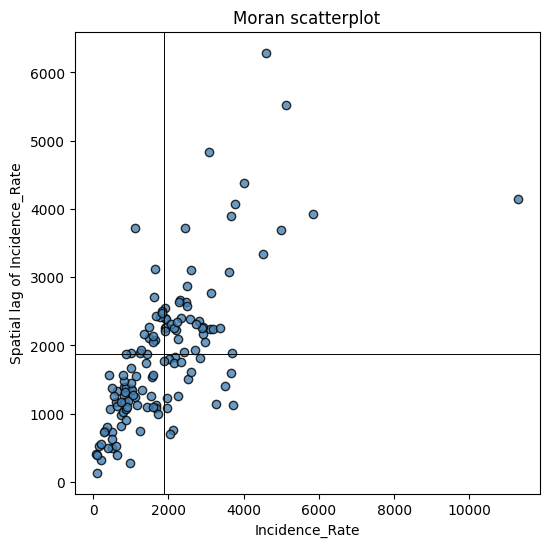

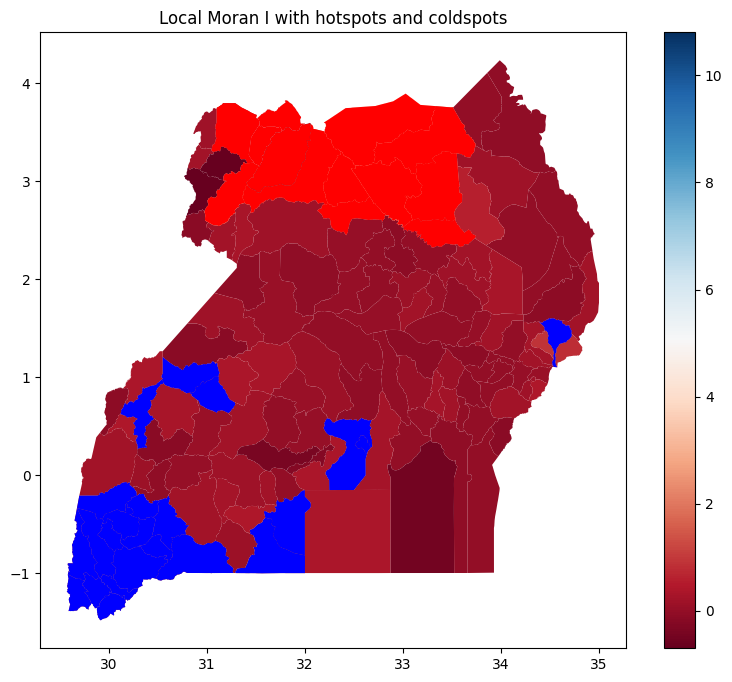

In [139]:
import matplotlib.pyplot as plt
from esda import Moran_Local
import numpy as np

y = gdf_valid['Incidence_Rate'].to_numpy()
lag = w_subset.sparse.dot(y)

plt.figure(figsize=(6,6))
plt.axvline(y.mean(), color='k', linewidth=0.7)
plt.axhline(y.mean(), color='k', linewidth=0.7)
plt.scatter(y, lag, c='steelblue', edgecolor='k', alpha=0.8)
plt.xlabel('Incidence_Rate')
plt.ylabel('Spatial lag of Incidence_Rate')
plt.title('Moran scatterplot')
plt.show()

ml = Moran_Local(y, w_subset, permutations=999)
gdf_valid['Local_I'] = ml.Is
gdf_valid['Local_p'] = ml.p_sim
gdf_valid['Local_q'] = ml.q

gdf_valid['hotspot'] = ((gdf_valid['Local_q'] == 1) & (gdf_valid['Local_p'] < 0.05)).astype(int)
gdf_valid['coldspot'] = ((gdf_valid['Local_q'] == 3) & (gdf_valid['Local_p'] < 0.05)).astype(int)

# quick map of hotspots
ax = gdf_valid.plot(column='Local_I', cmap='RdBu', legend=True, figsize=(10,8))
gdf_valid[gdf_valid['hotspot']==1].plot(ax=ax, color='red', markersize=20)
gdf_valid[gdf_valid['coldspot']==1].plot(ax=ax, color='blue', markersize=20)
plt.title('Local Moran I with hotspots and coldspots')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_16720\1964966771.py:34: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax2.legend()
C:\Users\User\AppData\Local\Temp\ipykernel_16720\1964966771.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


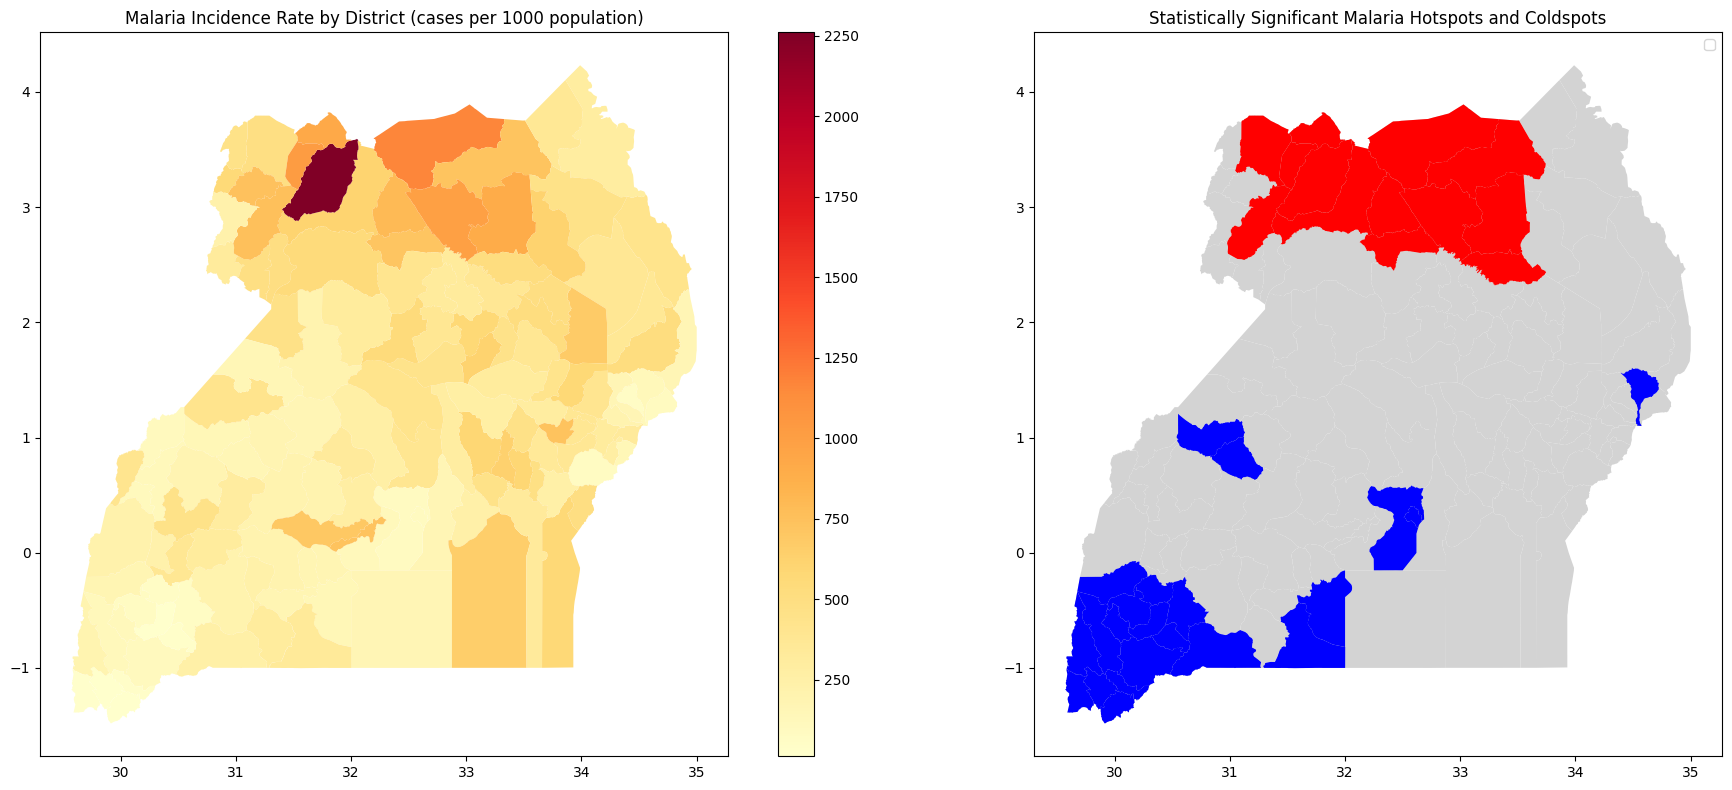

In [74]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Map 1: Incidence Rates
gdf_merged.plot(
    column='Incidence_Rate',
    cmap='YlOrRd',
    legend=True,
    ax=ax1,
    missing_kwds={"color": "lightgrey", "label": "Missing values"}
)
ax1.set_title('Malaria Incidence Rate by District (cases per 1000 population)')

# Map 2: Statistical Significance
from esda.moran import Moran_Local

# Calculate Local Moran's I for hotspot analysis
local_moran = Moran_Local(incidence_rates, w_subset)

# Create a significance mask
sig = local_moran.p_sim < 0.05
hotspots = (local_moran.q == 1) & sig  # High-High clusters
coldspots = (local_moran.q == 3) & sig  # Low-Low clusters

# Add these to the dataframe
gdf_merged.loc[valid_idx, 'hotspot'] = hotspots
gdf_merged.loc[valid_idx, 'coldspot'] = coldspots

# Plot hotspots and coldspots
gdf_merged.plot(color='lightgrey', ax=ax2)
gdf_merged[gdf_merged['hotspot'] == True].plot(color='red', ax=ax2, label='Hotspot (HH)')
gdf_merged[gdf_merged['coldspot'] == True].plot(color='blue', ax=ax2, label='Coldspot (LL)')
ax2.set_title('Statistically Significant Malaria Hotspots and Coldspots')
ax2.legend()

plt.tight_layout()
plt.show()

## Write the data to Disk

In [133]:
master_df.to_csv("master_malaria_cleaned.csv", index=False)
